# Stats for Participation

## Normalized values respect the number of words

In [1]:
import numpy as np
import pandas as pd
import json

file = open('treemap2.json', 'r')
Lines = file.readlines()

elastic_docs = []
for line in Lines:
    elastic_docs.append(json.loads(line.strip()))

In [18]:
locations = {
    "No location": 0,
    "Geo location": 0,
    "User location": 0
}

location_fields = {
    "Religious": {"Pro": np.array([]), "Counter": np.array([]), "Alternative": np.array([])},
    "Far right": {"Pro": np.array([]), "Counter": np.array([]), "Alternative": np.array([])},
    "Far left": {"Pro": np.array([]), "Counter": np.array([]), "Alternative": np.array([])},
    "Separatism": {"Pro": np.array([]), "Counter": np.array([]), "Alternative": np.array([])}
}
places = np.array([])

for doc in elastic_docs:
    if "schema:locationCreated" in doc["_source"] and "location" in doc["_source"]:
        locations["User location"] += 1
        
        place = doc["_source"]["schema:locationCreated"]
        
        
        if place in places:
            index = np.where(places==place)[0]
            
            for ideology in doc["_source"]["ideology"]:
                narrative = doc["_source"][ideology]
                location_fields[ideology][narrative][index] += 1
        else:
            places = np.append(places, [place])
            index = np.where(places==place)[0]
            for i in location_fields.keys():
                for n in location_fields[i].keys():
                    location_fields[i][n] = np.append(location_fields[i][n], [0])

            for ideology in doc["_source"]["ideology"]:
                narrative = doc["_source"][ideology]
                location_fields[ideology][narrative][index] += 1
            
    elif "location" in doc["_source"]:
        locations["Geo location"] += 1
    else:
        locations["No location"] += 1

print(location_fields)
print(places)
print(locations)
locations["User location"] = locations["User location"]*100/len(elastic_docs)
locations["Geo location"] = locations["Geo location"]*100/len(elastic_docs)
locations["No location"] = locations["No location"]*100/len(elastic_docs)
locations

<ipython-input-18-12bd1c4ddb47>:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if place in places:


{'Religious': {'Pro': array([2.700e+01, 1.440e+02, 1.370e+02, 1.190e+02, 2.301e+03, 3.500e+01,
       2.400e+01, 2.100e+02, 2.800e+01, 7.800e+01, 4.100e+02, 5.600e+01,
       0.000e+00, 2.570e+02, 1.400e+01, 2.400e+01, 0.000e+00, 6.000e+00,
       1.700e+01, 2.900e+01, 0.000e+00, 4.000e+00, 2.600e+01, 2.560e+02,
       0.000e+00, 0.000e+00, 0.000e+00, 1.200e+01, 1.000e+00, 7.300e+01,
       1.000e+00, 1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
       1.200e+01, 1.000e+00, 5.000e+00, 0.000e+00, 6.000e+00, 2.000e+00,
       0.000e+00, 8.000e+00, 2.100e+01, 2.000e+00, 1.300e+01, 3.000e+00,
       7.000e+00, 0.000e+00, 2.000e+00, 1.800e+01, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
       1.000e+00, 1.000e+00, 1.000e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
       1.000e+00, 0.000e+00, 

{'No location': 50.2448734557174,
 'Geo location': 0.2654112294227306,
 'User location': 49.48971531485987}

In [2]:
categories = [
    "Affiliation", "Achievement", "Reward", "Power", "Risk",
    "Family", "Friend", "Female", "Male",
    "Anxiety", "Anger", "Sad", "Positive", "Negative",
    "Work", "Money", "Leisure", "Home", "Religion", "Death",
]
categ_dict = dict((key,value) for key, value in zip(categories, [np.array([])]*20))

liwc_fields = {
    "Religious": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()},
    "Far right": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()},
    "Far left": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()},
    "Separatism": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()}
}

for doc in elastic_docs:
    # get source data from document
    source_data = doc["_source"]

    for ideology in source_data["ideology"]:
        narrative = source_data[ideology]
        
        categ_copy = categories.copy()
        for i in source_data["onyx:hasEmotionSet"]:
            category = i["onyx:hasEmotionCategory"]
            categ_copy.remove(category)
            
            liwc_fields[ideology][narrative][category] = np.append(
                liwc_fields[ideology][narrative][category], i["onyx:hasEmotionIntensity"]
            )
            
        for c in categ_copy:
            liwc_fields[ideology][narrative][c] = np.append(
                liwc_fields[ideology][narrative][c], [0]
            )

liwc_fields

{'Religious': {'Pro': {'Affiliation': array([0.        , 0.        , 0.        , ..., 7.89473684, 0.        ,
          4.16666667]),
   'Achievement': array([0.        , 0.        , 0.        , ..., 5.26315789, 0.        ,
          0.        ]),
   'Reward': array([0.        , 0.        , 0.        , ..., 2.63157895, 0.        ,
          4.16666667]),
   'Power': array([0., 0., 0., ..., 0., 5., 0.]),
   'Risk': array([0., 0., 0., ..., 0., 0., 0.]),
   'Family': array([0., 0., 0., ..., 0., 0., 0.]),
   'Friend': array([0., 0., 0., ..., 0., 0., 0.]),
   'Female': array([0., 0., 0., ..., 0., 0., 0.]),
   'Male': array([0., 0., 0., ..., 0., 0., 0.]),
   'Anxiety': array([0., 0., 0., ..., 0., 0., 0.]),
   'Anger': array([0., 0., 0., ..., 0., 0., 0.]),
   'Sad': array([0., 0., 0., ..., 0., 0., 0.]),
   'Positive': array([ 0.        ,  0.        ,  0.        , ..., 10.52631579,
           0.        ,  8.33333333]),
   'Negative': array([0., 0., 0., ..., 0., 0., 0.]),
   'Work': array([0.  

4155


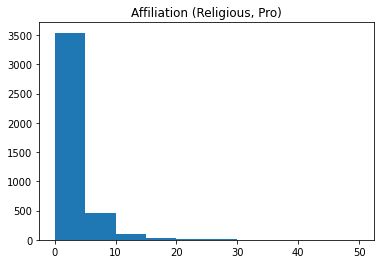

4155


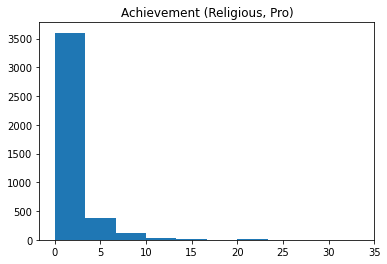

4155


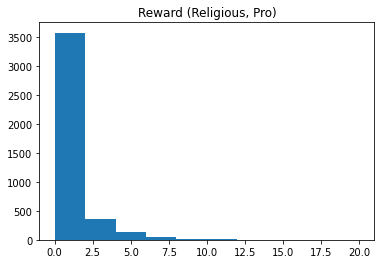

4155


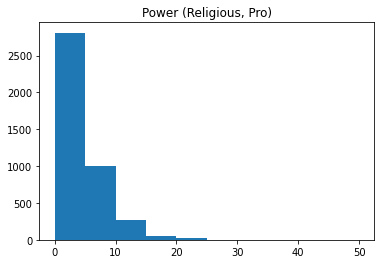

4155


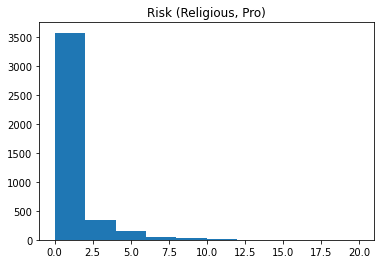

4155


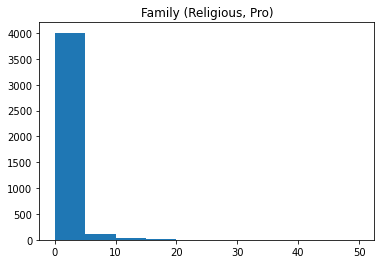

4155


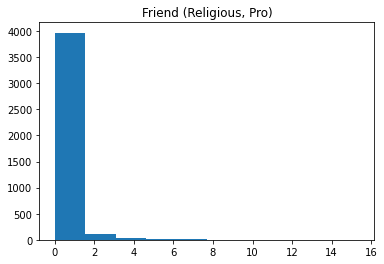

4155


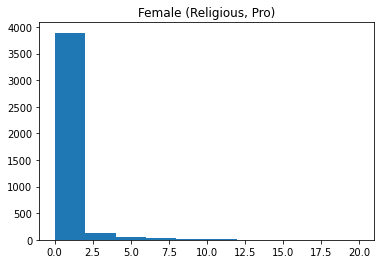

4155


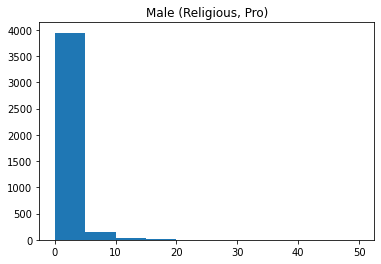

4155


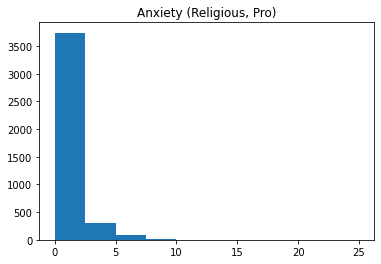

4155


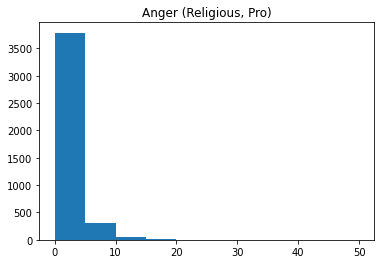

4155


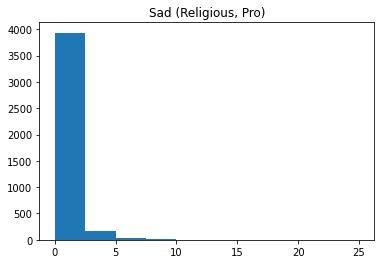

4155


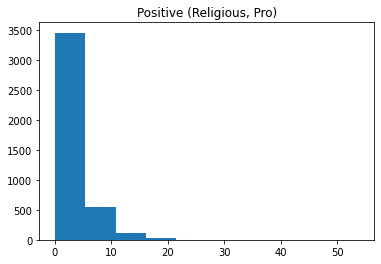

4155


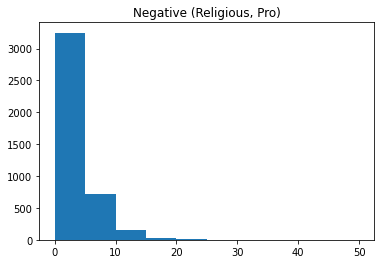

4155


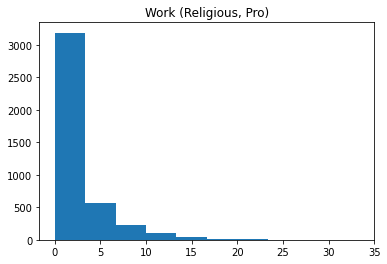

4155


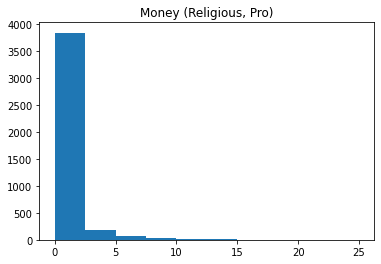

4155


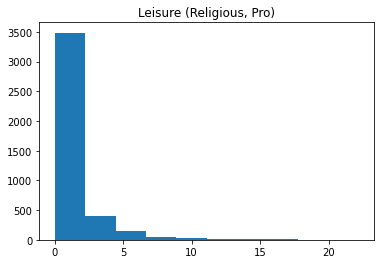

4155


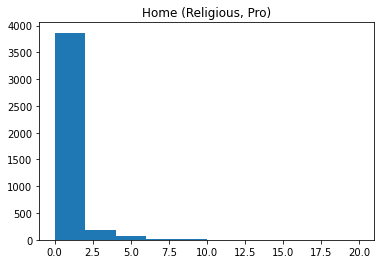

4155


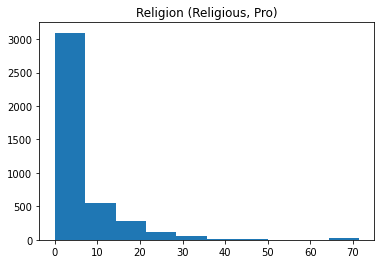

4155


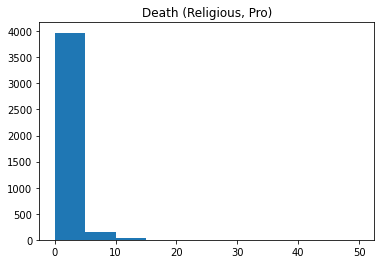

2327


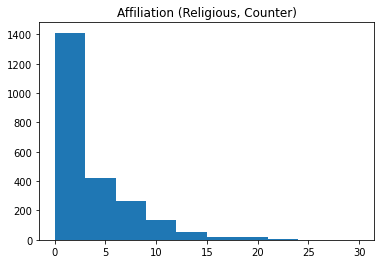

2327


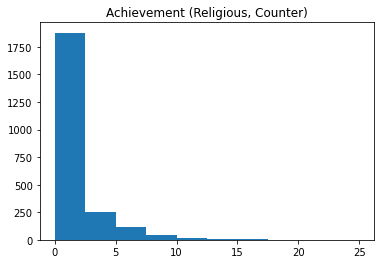

2327


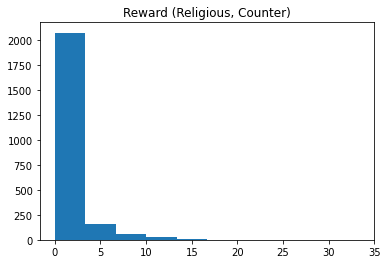

2327


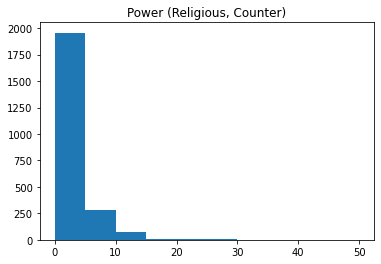

2327


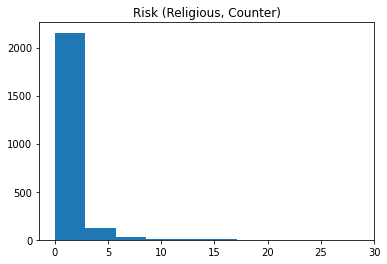

2327


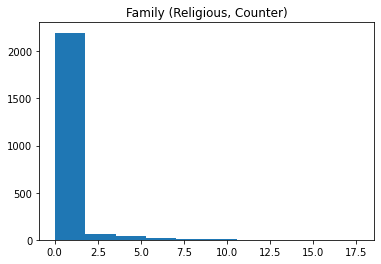

2327


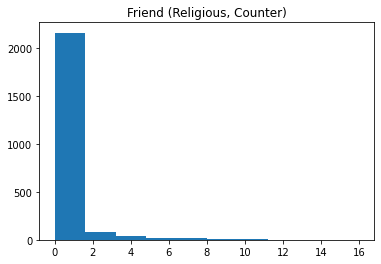

2327


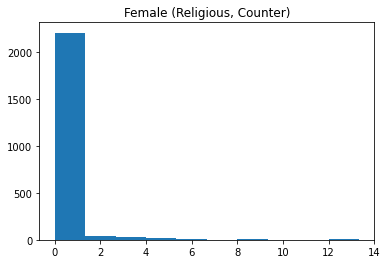

2327


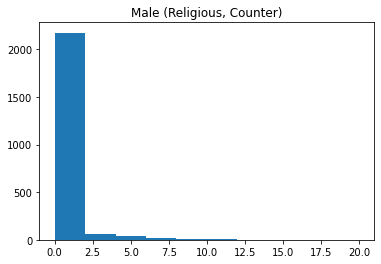

2327


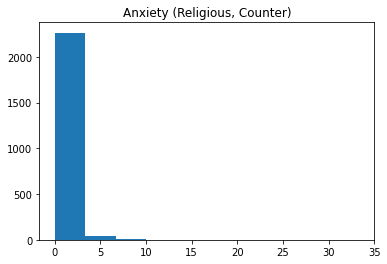

2327


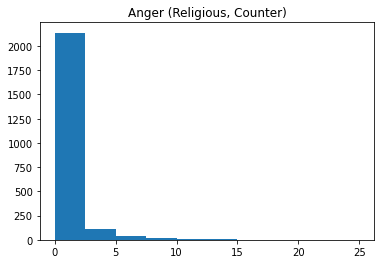

2327


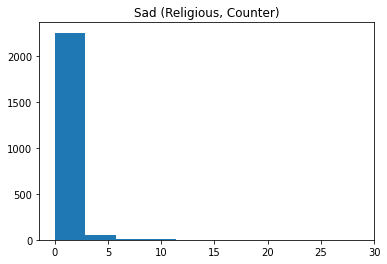

2327


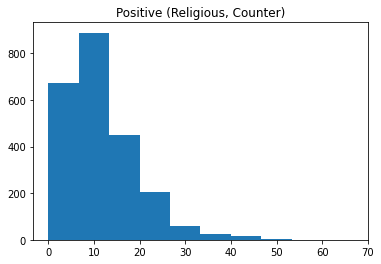

2327


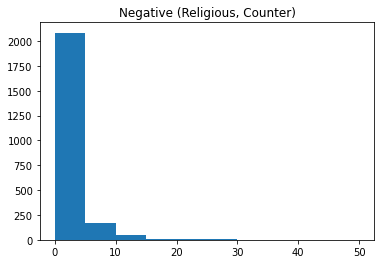

2327


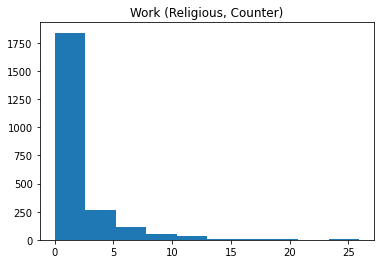

2327


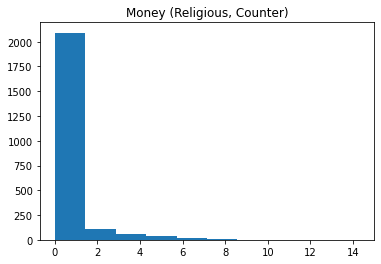

2327


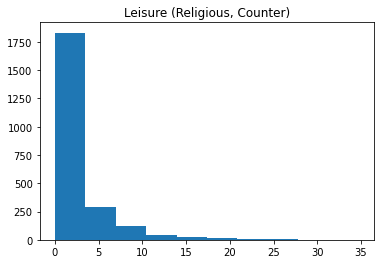

2327


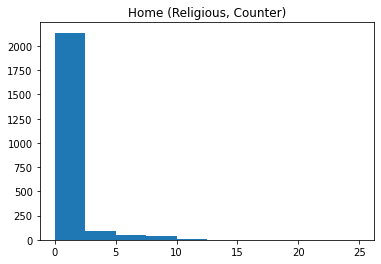

2327


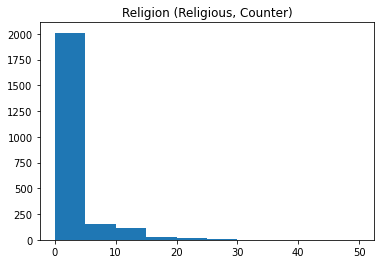

2327


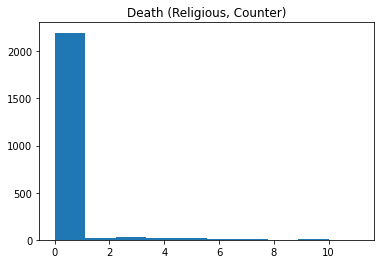

2


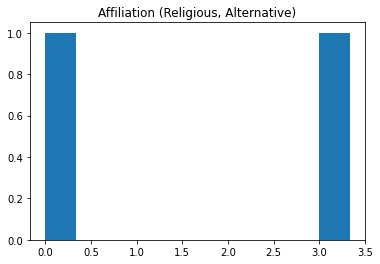

2


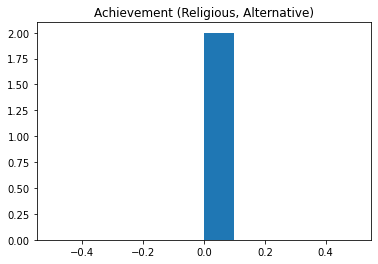

2


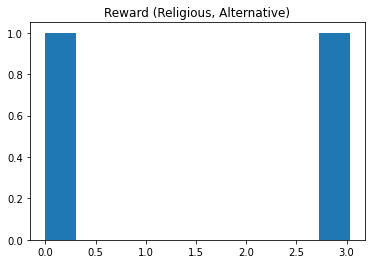

2


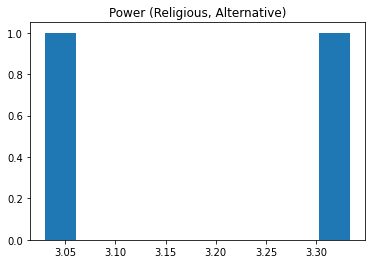

2


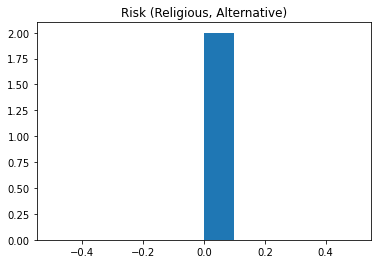

2


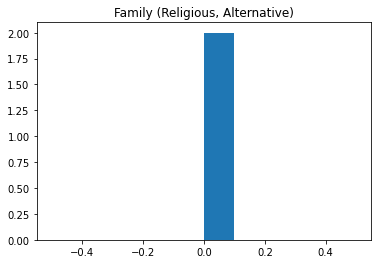

2


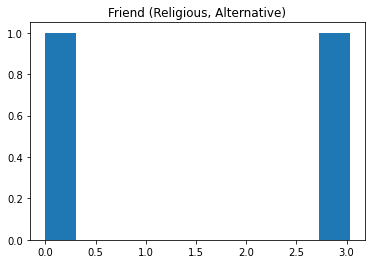

2


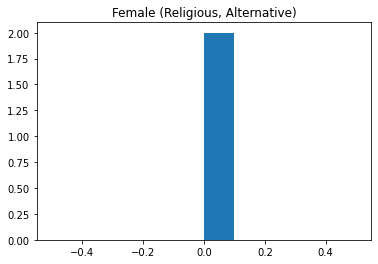

2


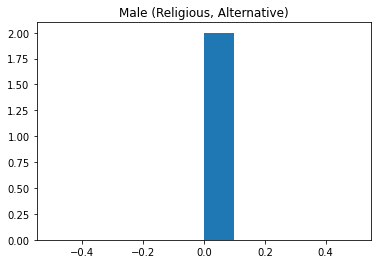

2


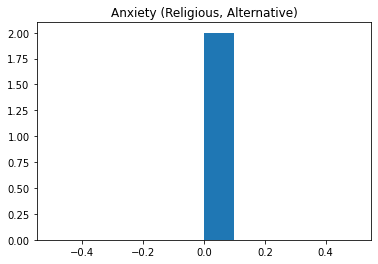

2


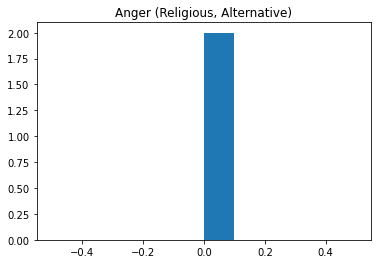

2


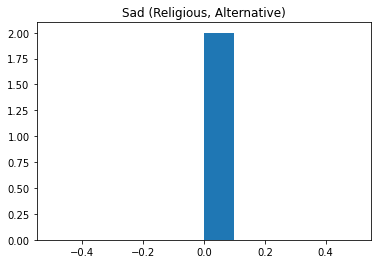

2


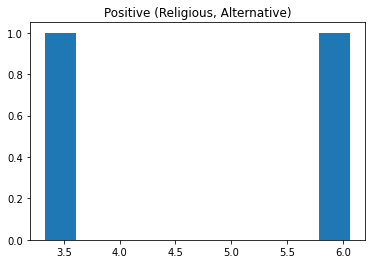

2


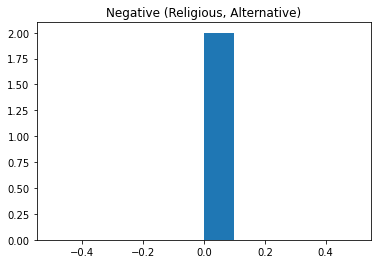

2


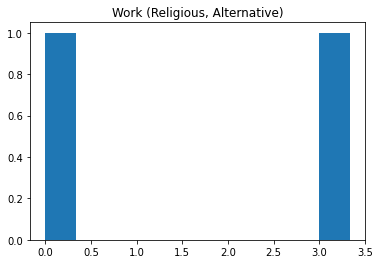

2


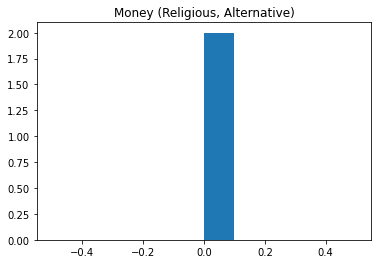

2


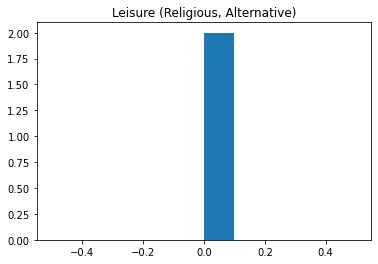

2


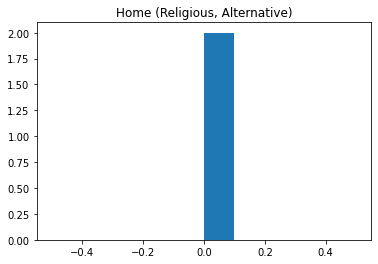

2


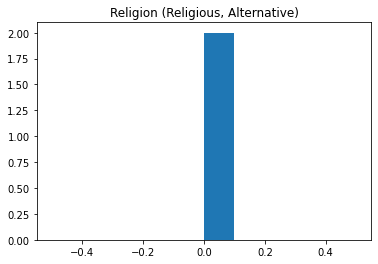

2


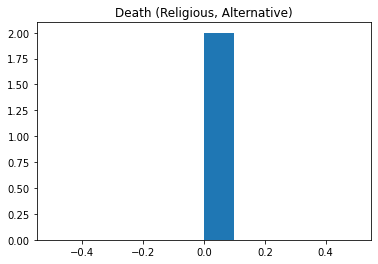

669


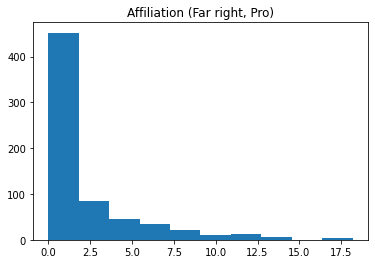

669


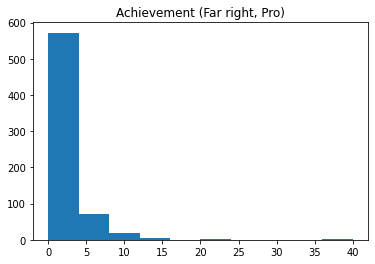

669


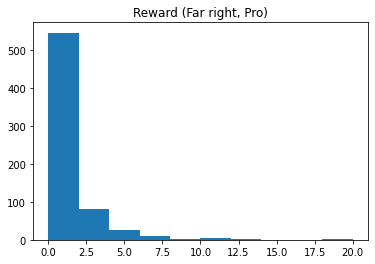

669


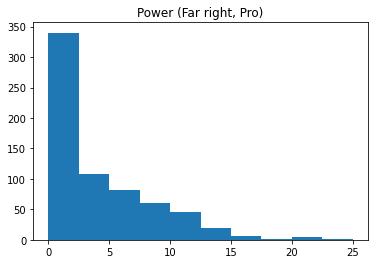

669


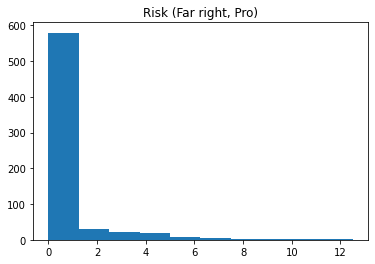

669


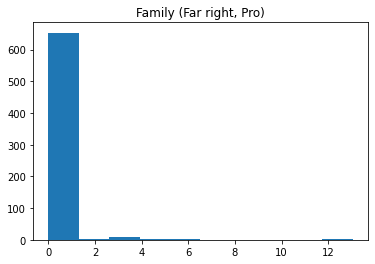

669


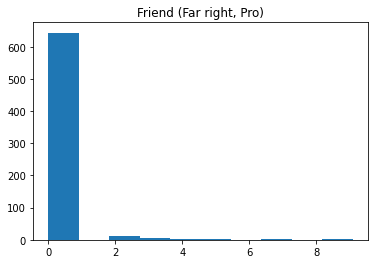

669


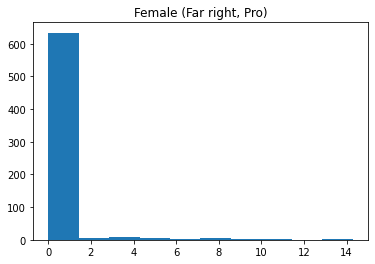

669


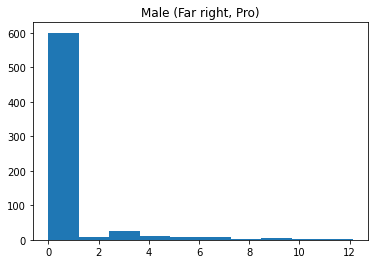

669


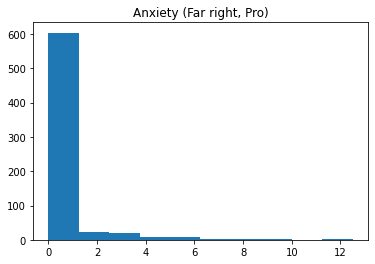

669


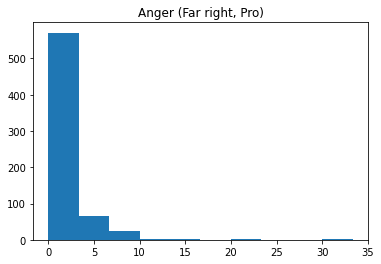

669


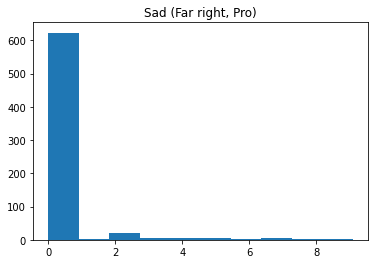

669


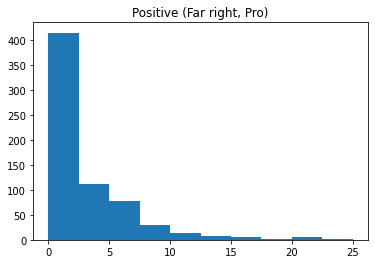

669


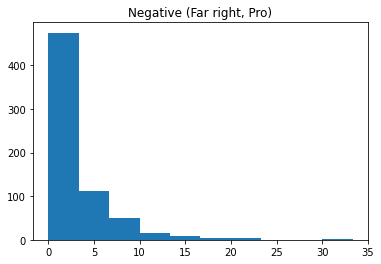

669


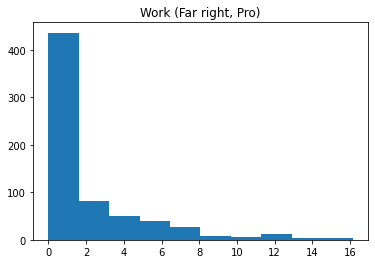

669


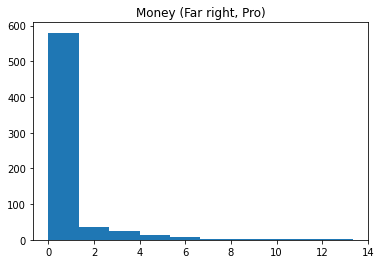

669


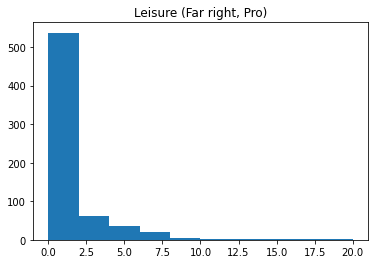

669


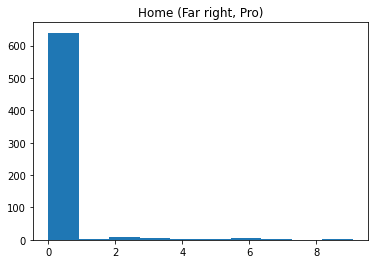

669


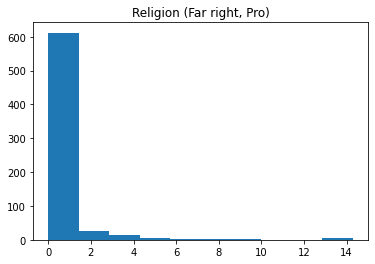

669


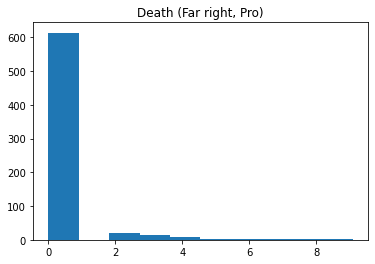

2963


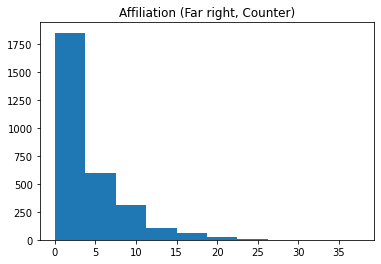

2963


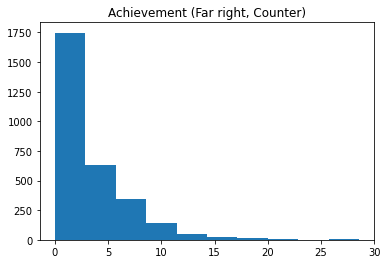

2963


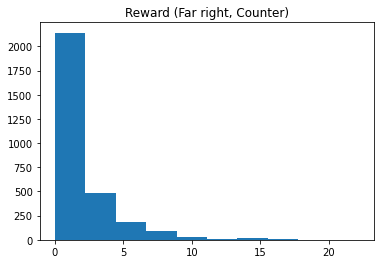

2963


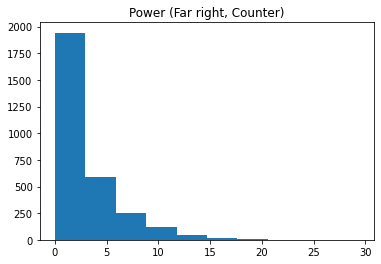

2963


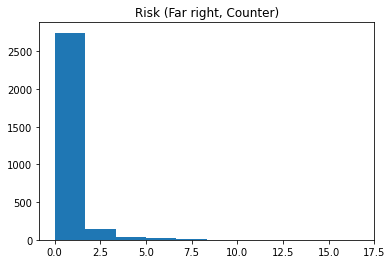

2963


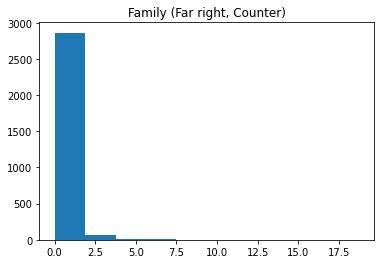

2963


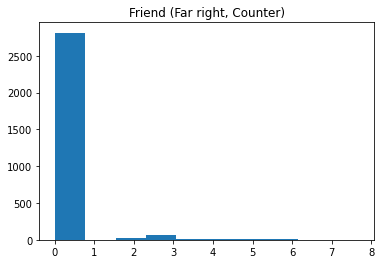

2963


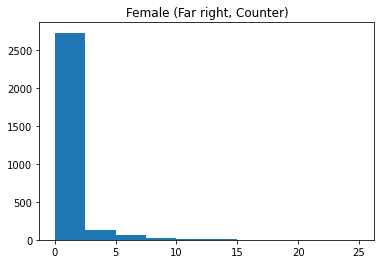

2963


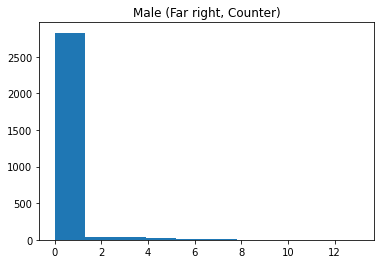

2963


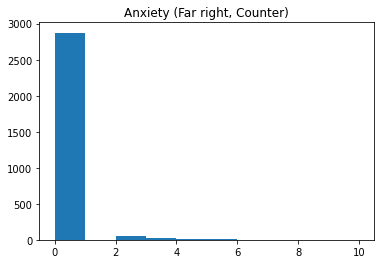

2963


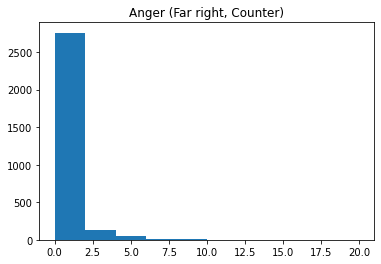

2963


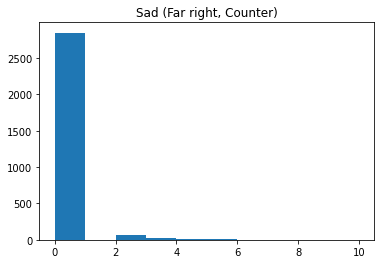

2963


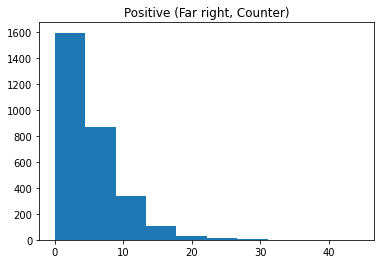

2963


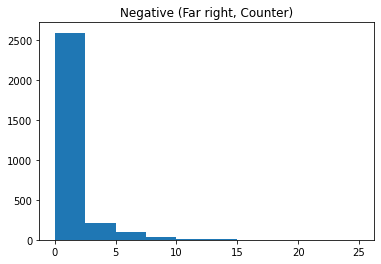

2963


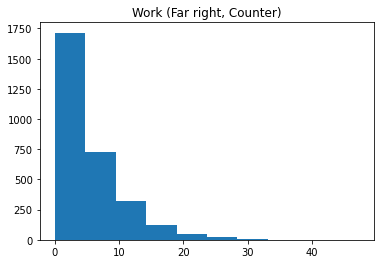

2963


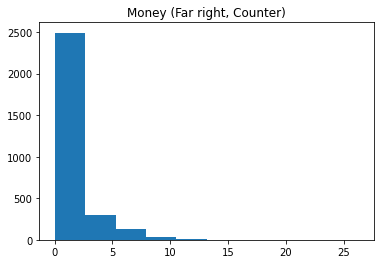

2963


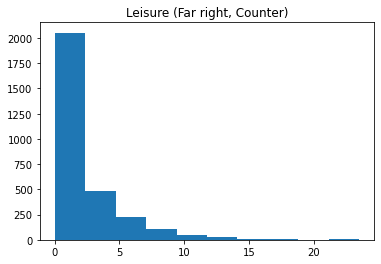

2963


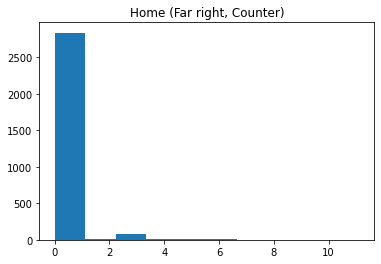

2963


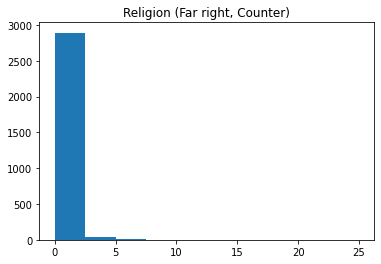

2963


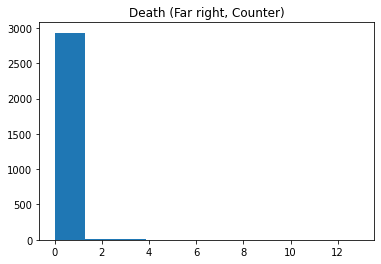

0


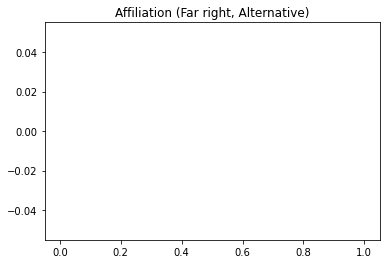

0


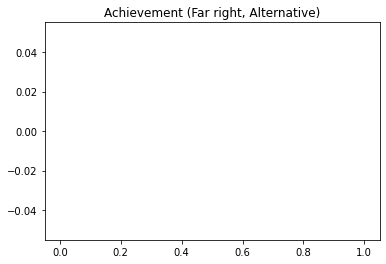

0


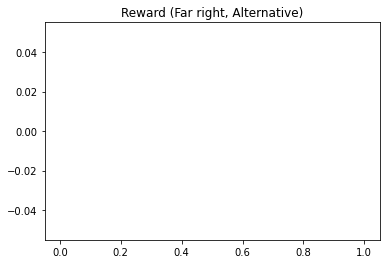

0


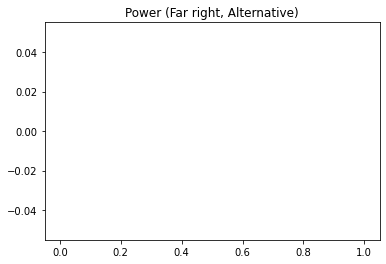

0


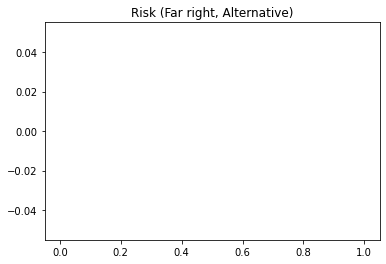

0


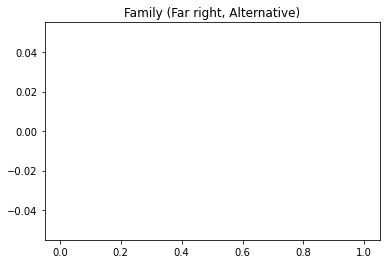

0


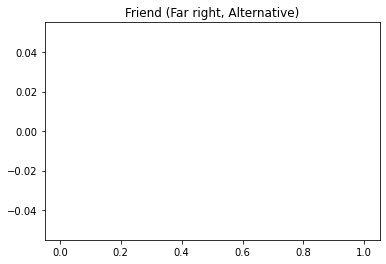

0


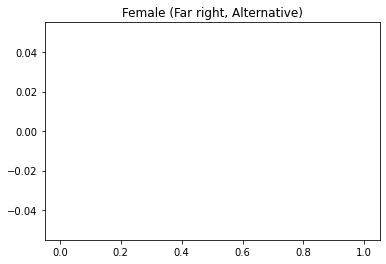

0


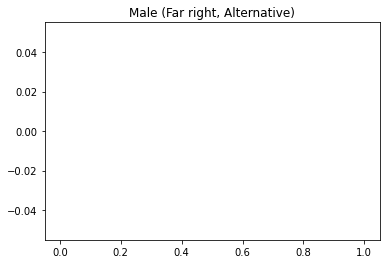

0


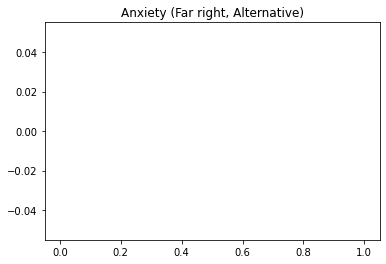

0


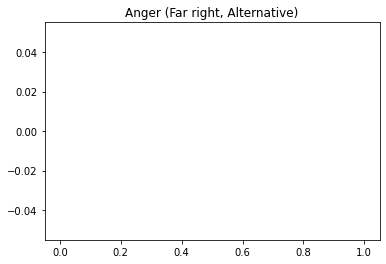

0


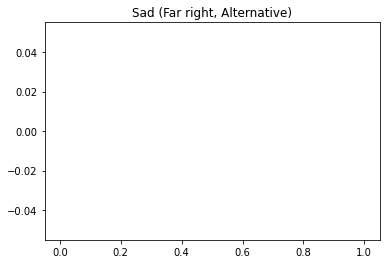

0


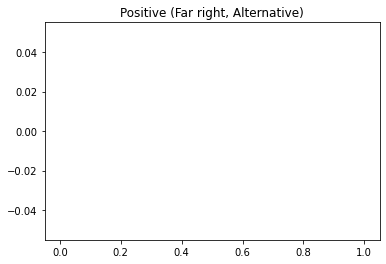

0


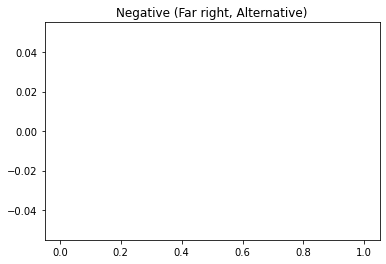

0


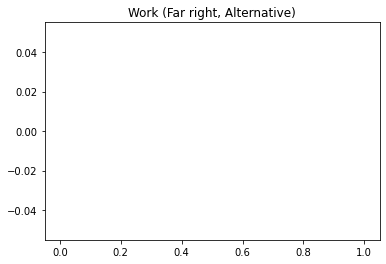

0


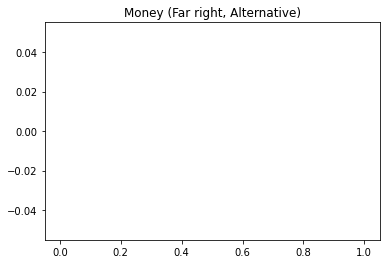

0


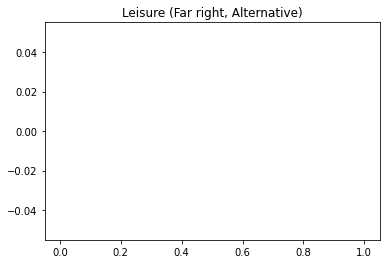

0


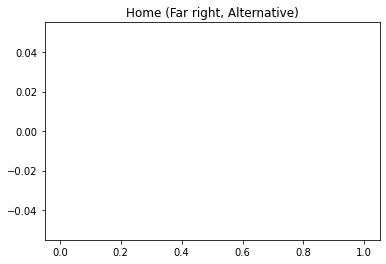

0


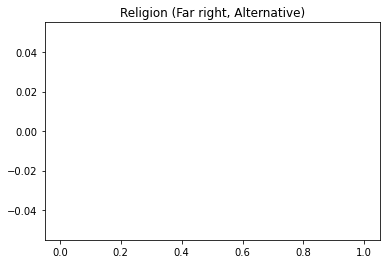

0


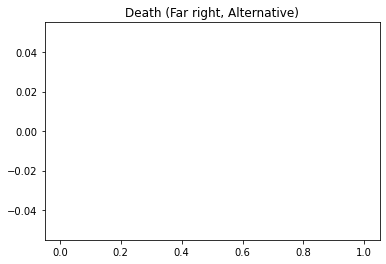

2435


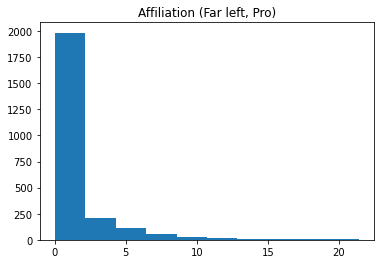

2435


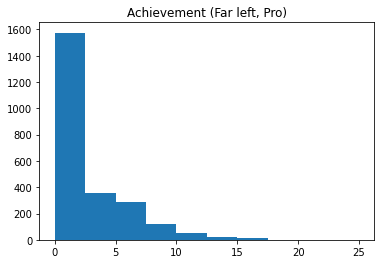

2435


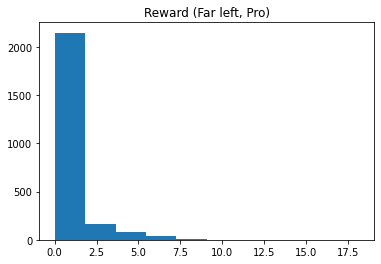

2435


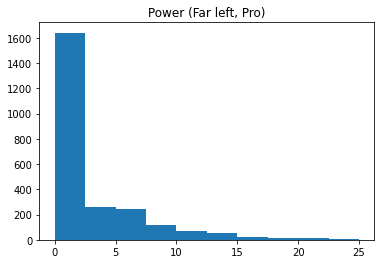

2435


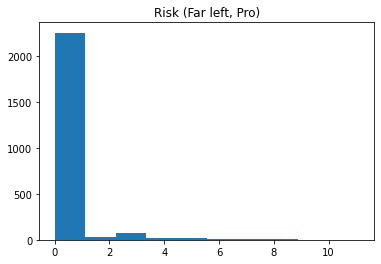

2435


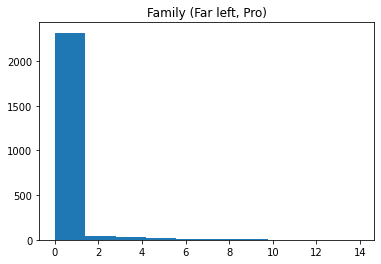

2435


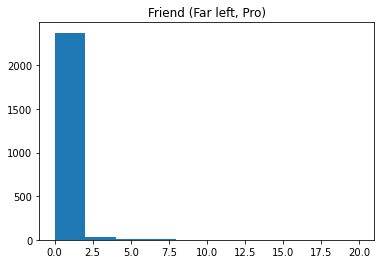

2435


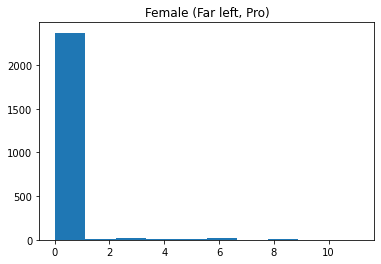

2435


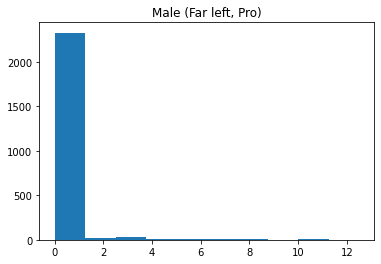

2435


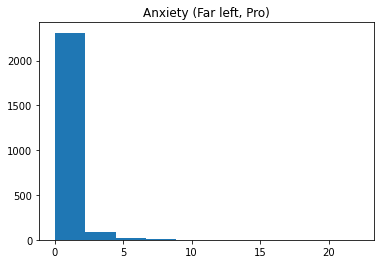

2435


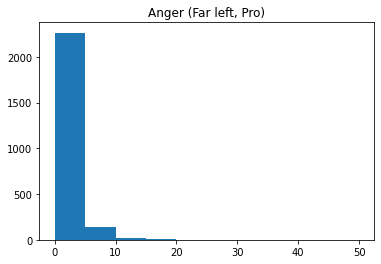

2435


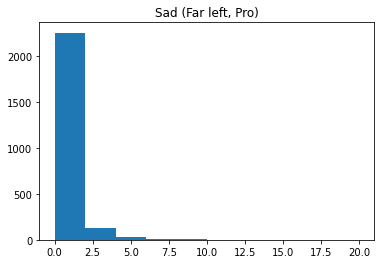

2435


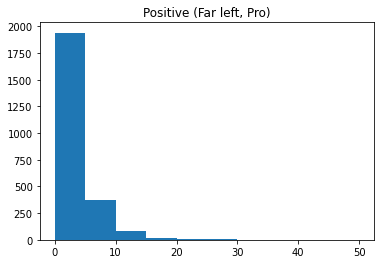

2435


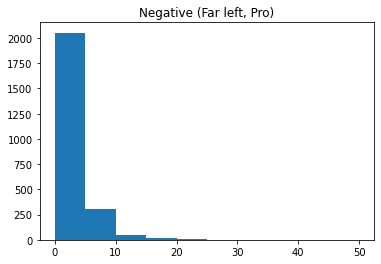

2435


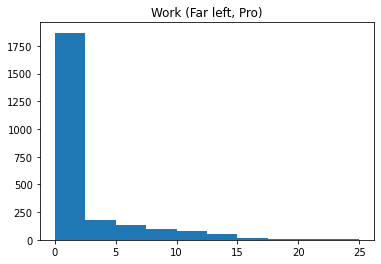

2435


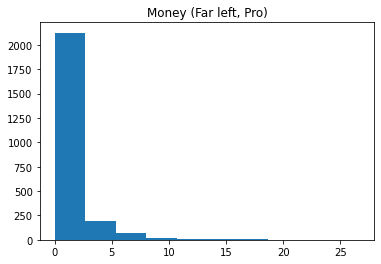

2435


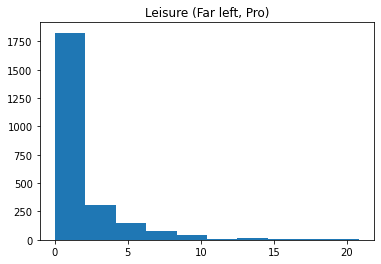

2435


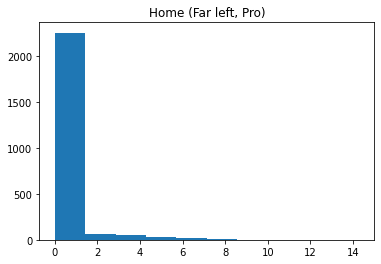

2435


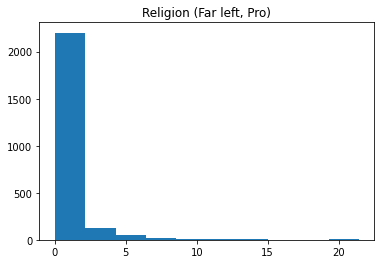

2435


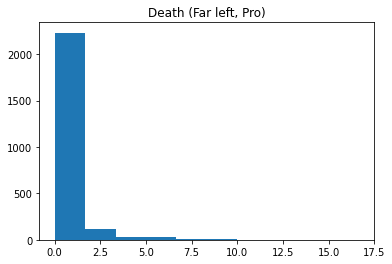

16


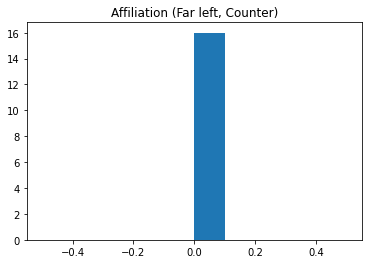

16


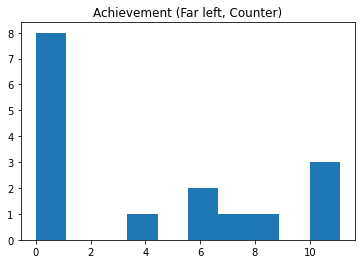

16


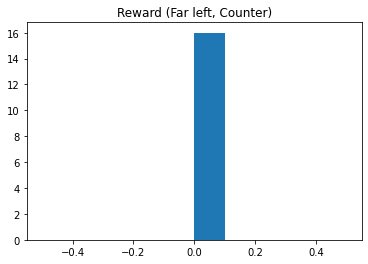

16


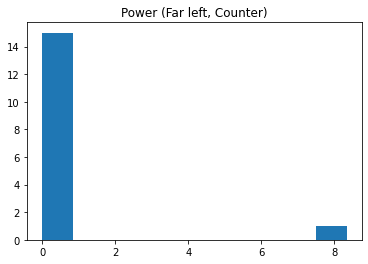

16


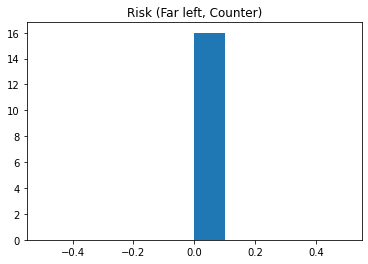

16


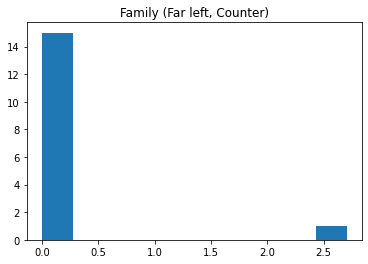

16


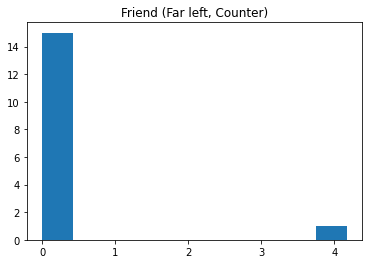

16


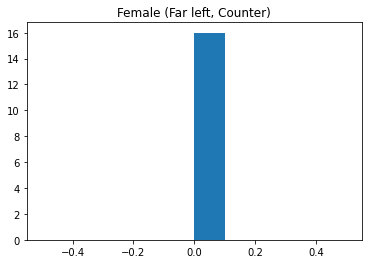

16


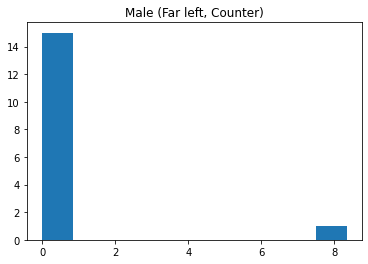

16


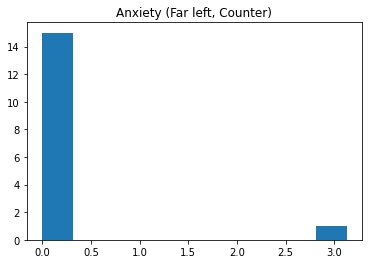

16


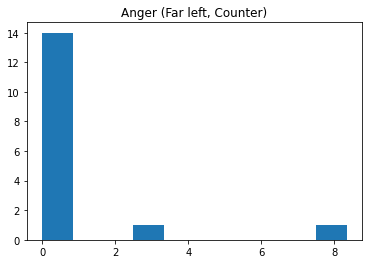

16


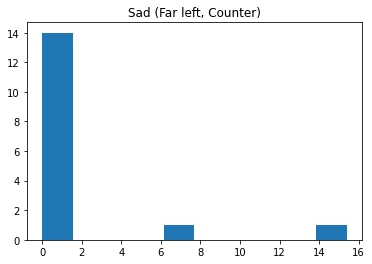

16


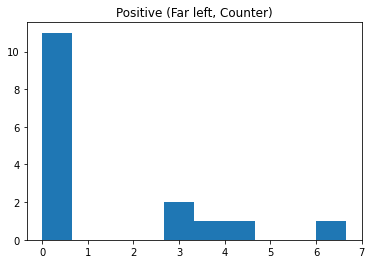

16


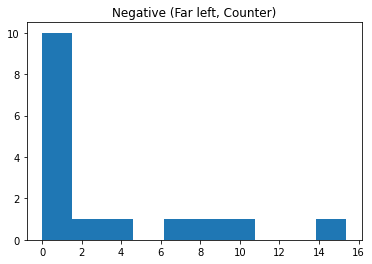

16


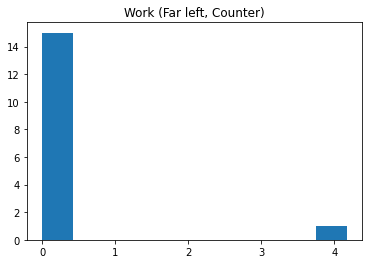

16


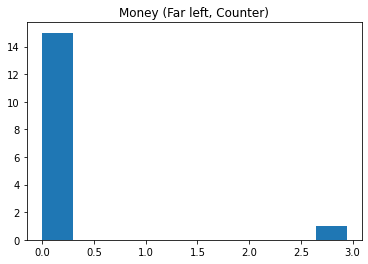

16


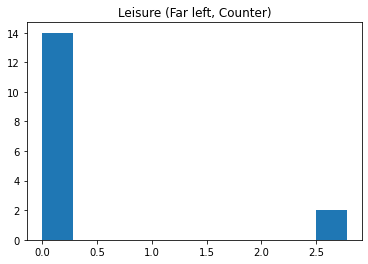

16


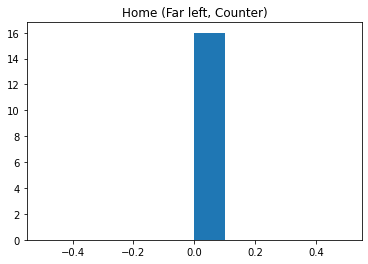

16


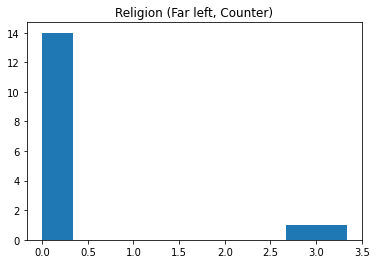

16


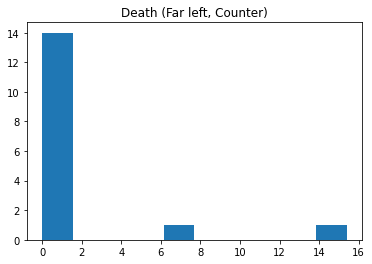

0


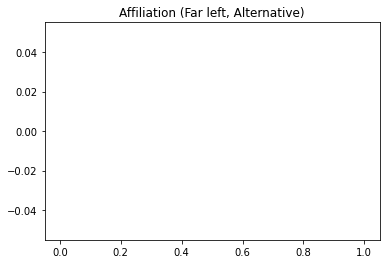

0


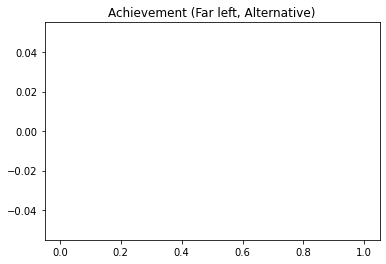

0


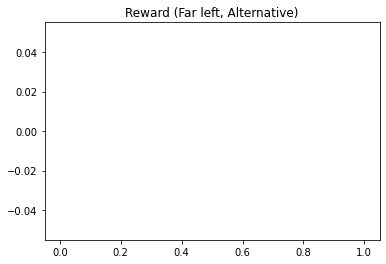

0


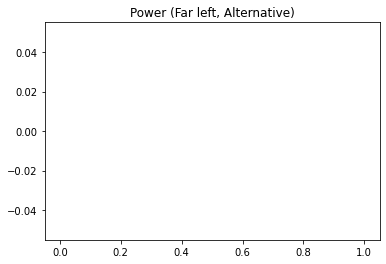

0


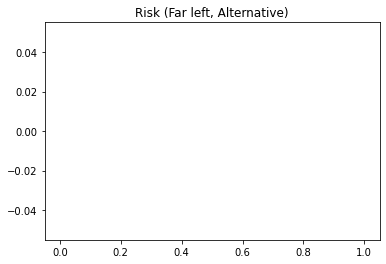

0


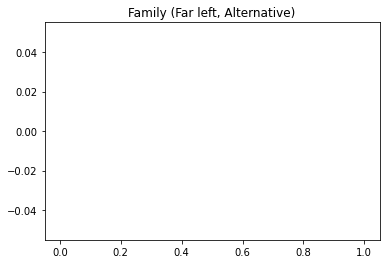

0


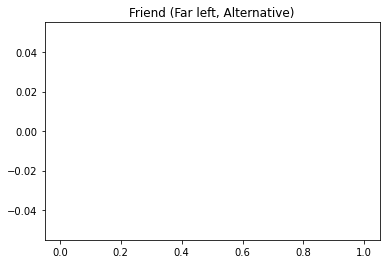

0


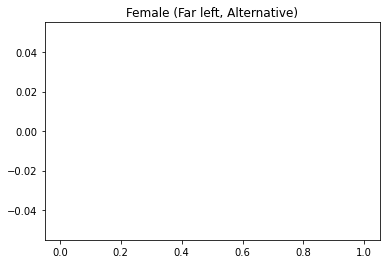

0


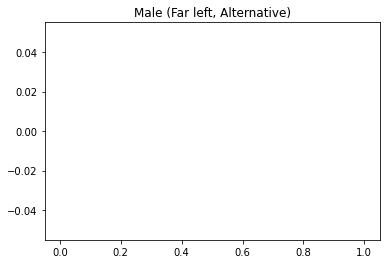

0


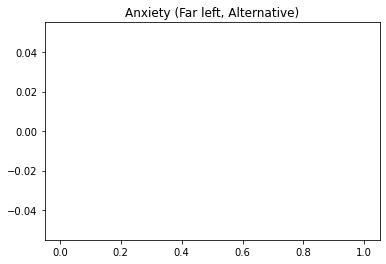

0


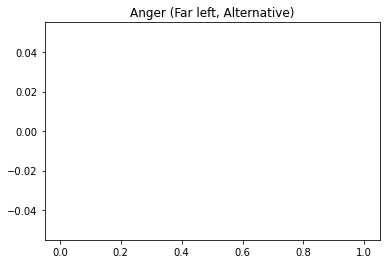

0


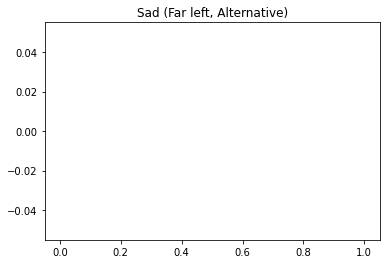

0


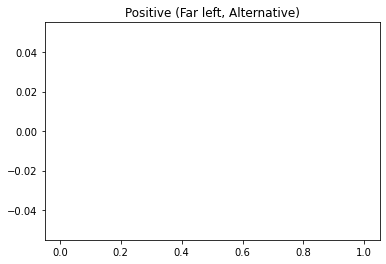

0


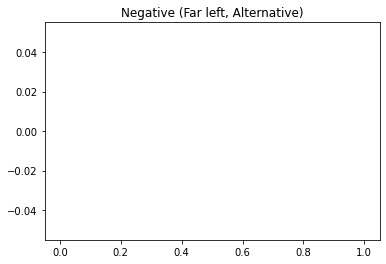

0


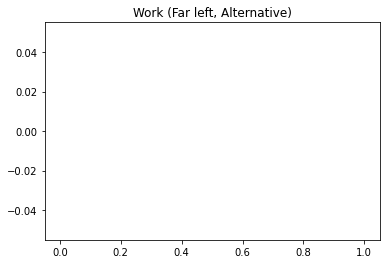

0


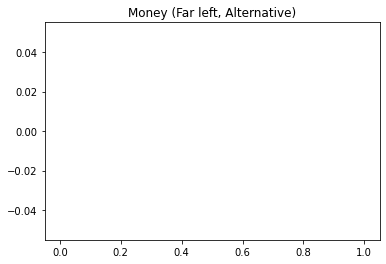

0


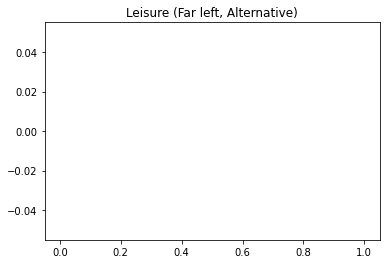

0


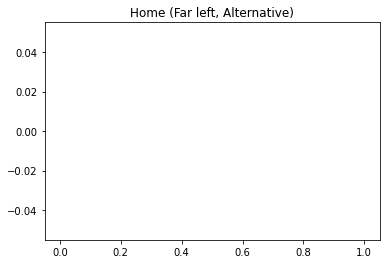

0


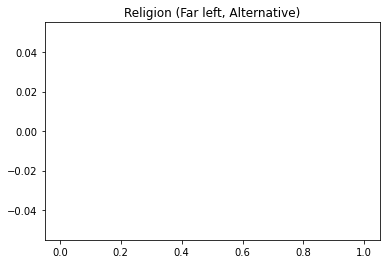

0


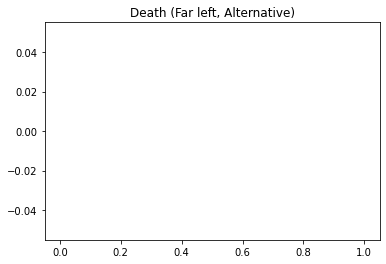

2949


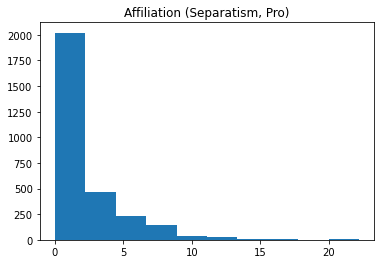

2949


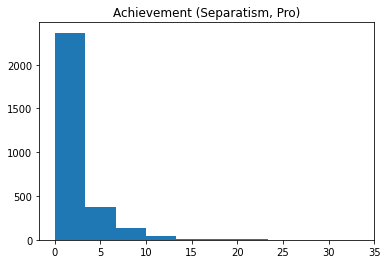

2949


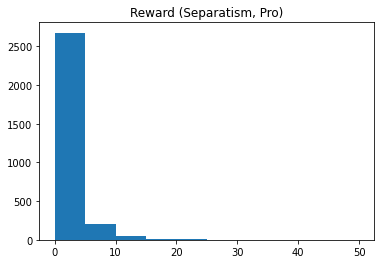

2949


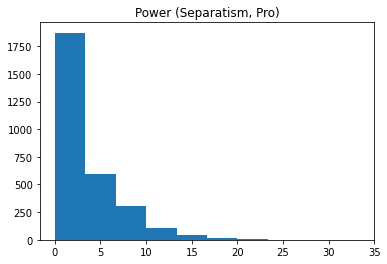

2949


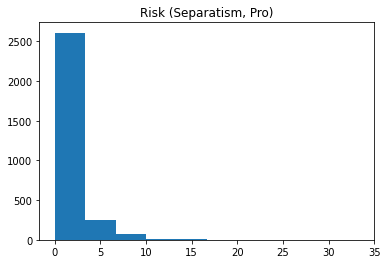

2949


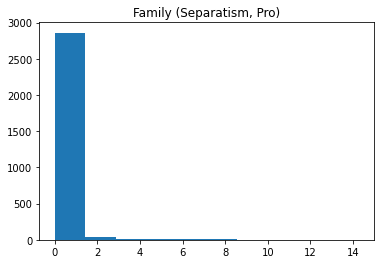

2949


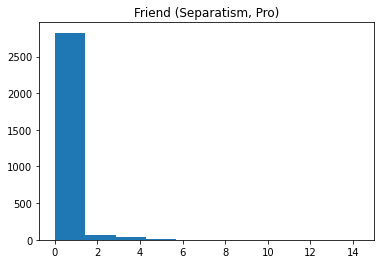

2949


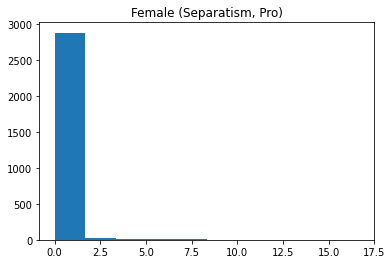

2949


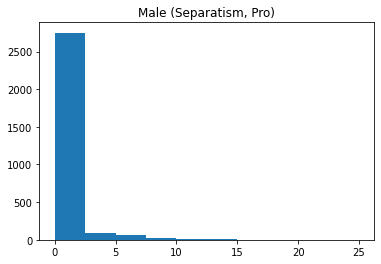

2949


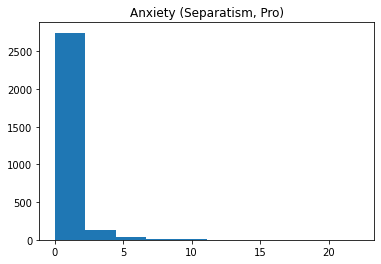

2949


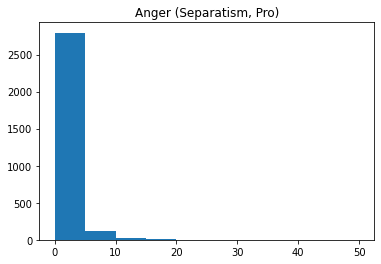

2949


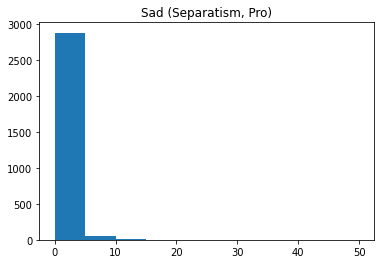

2949


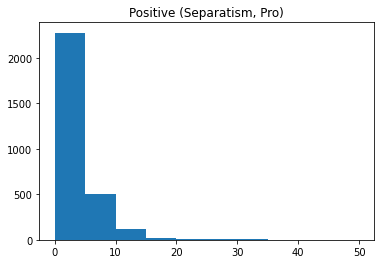

2949


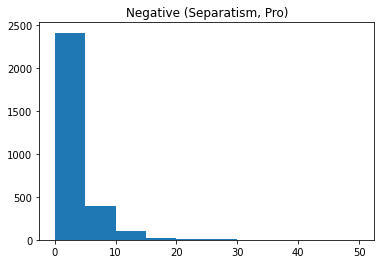

2949


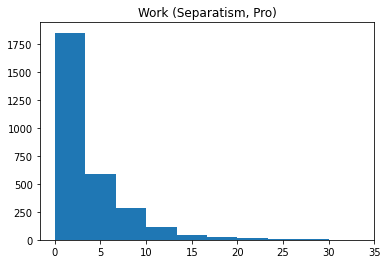

2949


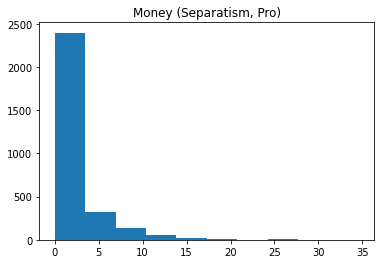

2949


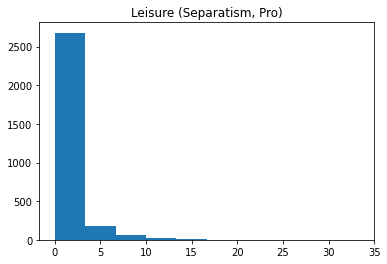

2949


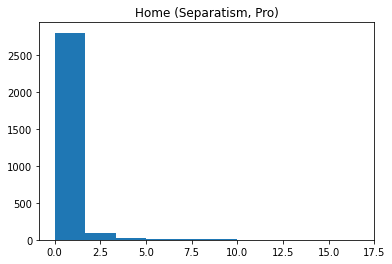

2949


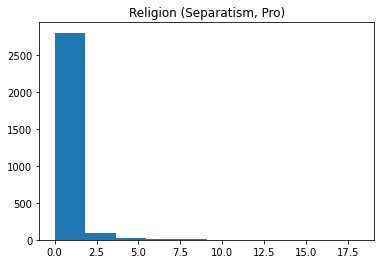

2949


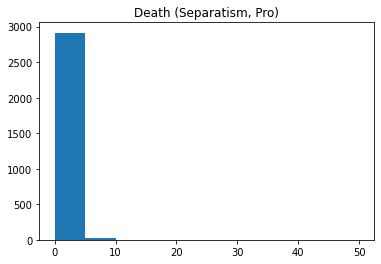

0


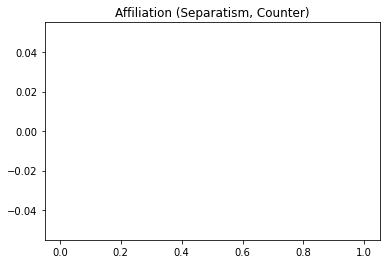

0


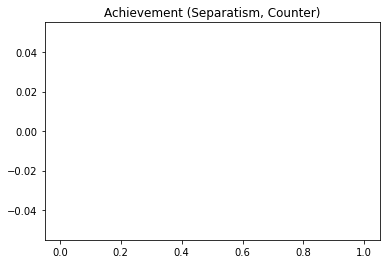

0


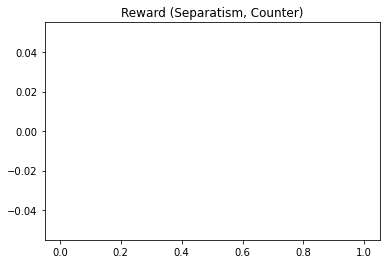

0


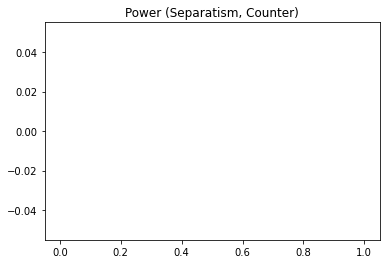

0


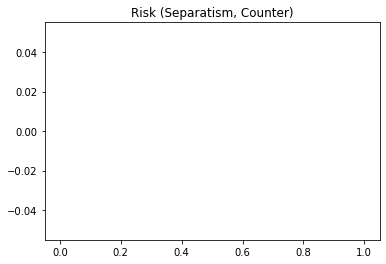

0


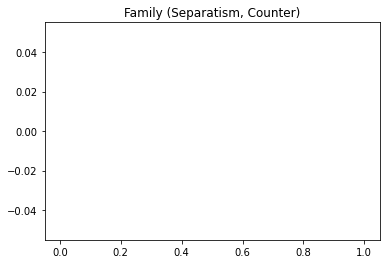

0


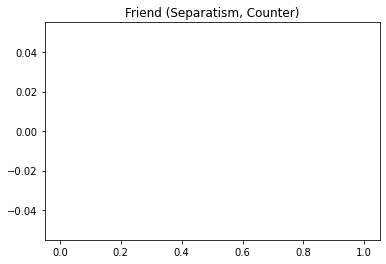

0


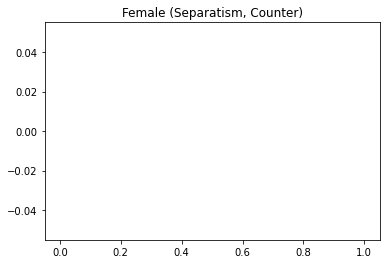

0


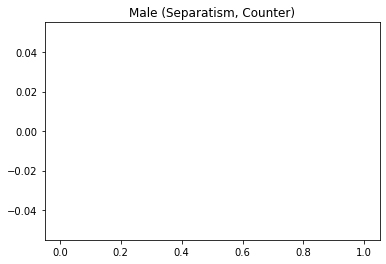

0


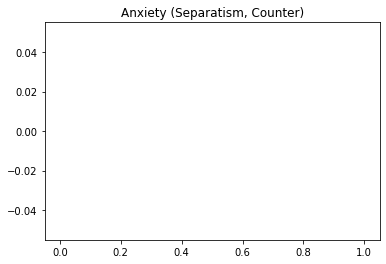

0


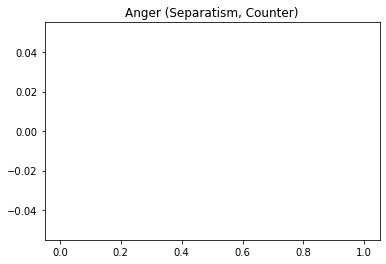

0


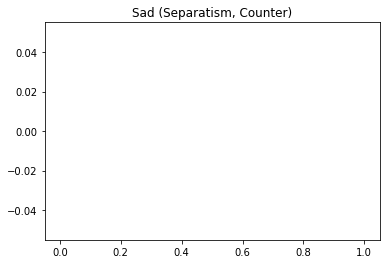

0


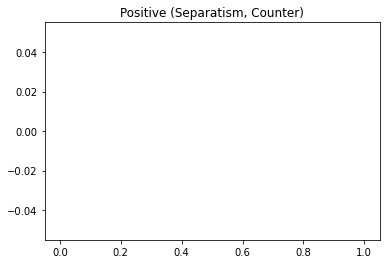

0


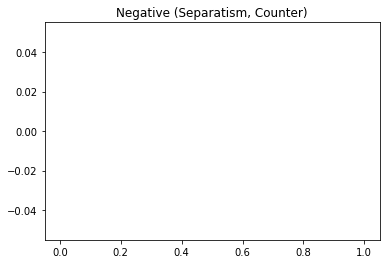

0


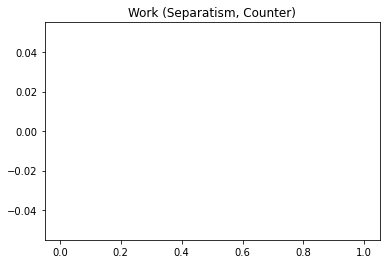

0


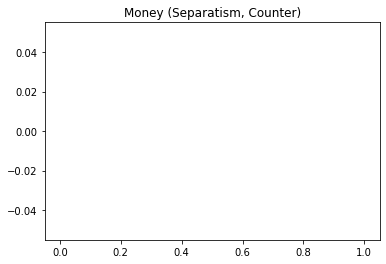

0


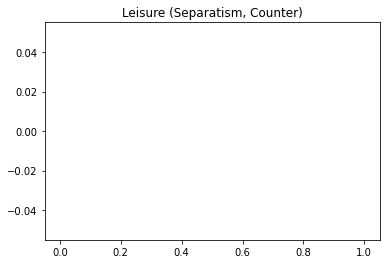

0


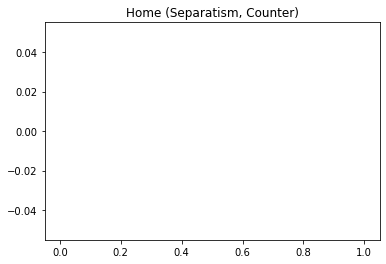

0


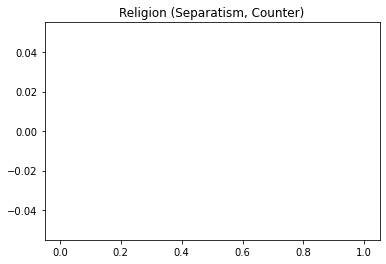

0


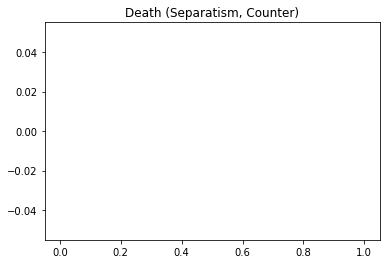

0


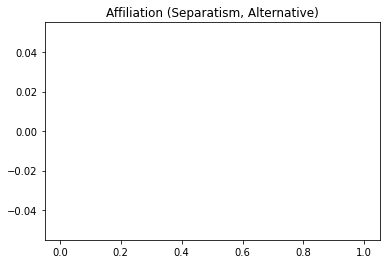

0


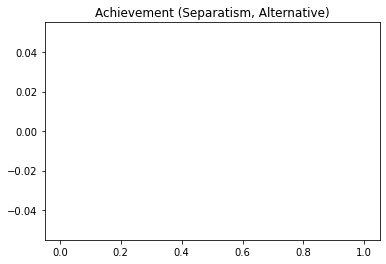

0


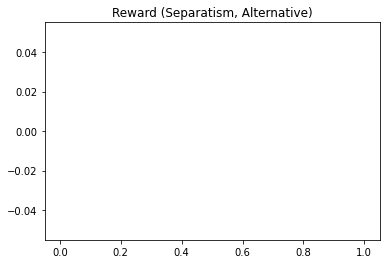

0


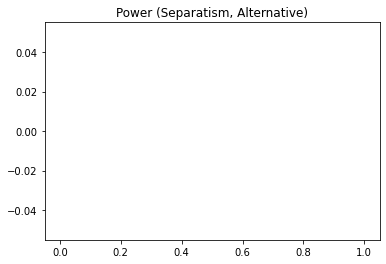

0


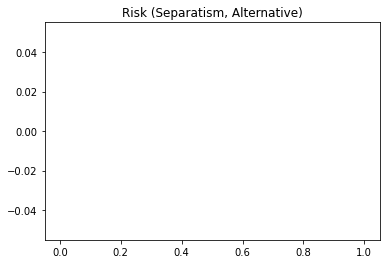

0


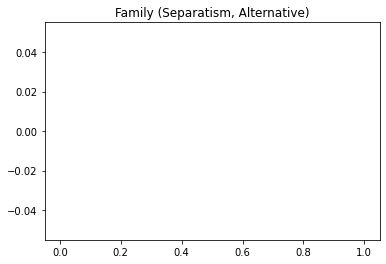

0


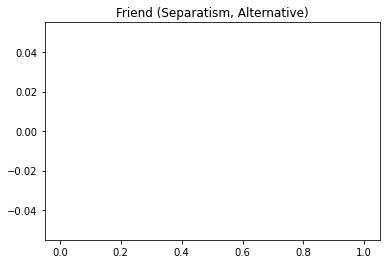

0


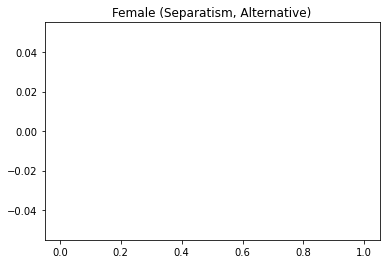

0


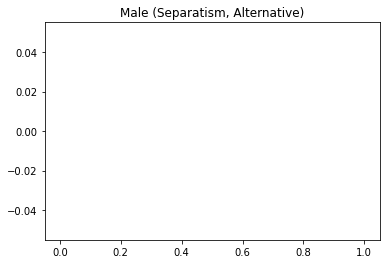

0


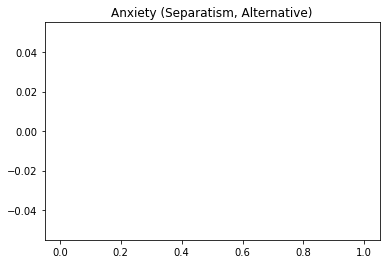

0


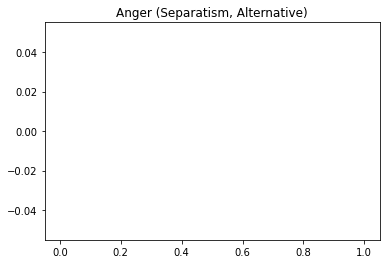

0


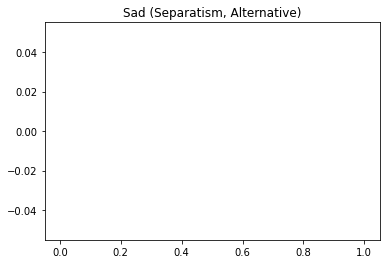

0


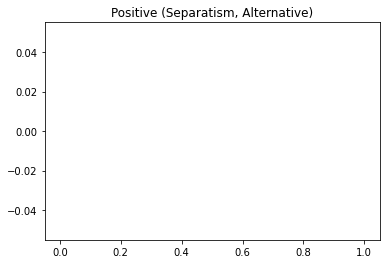

0


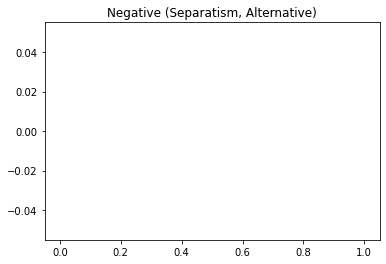

0


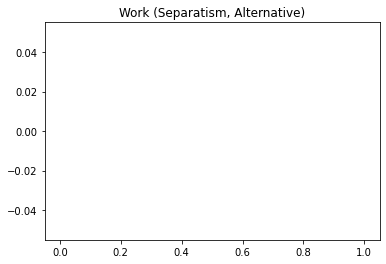

0


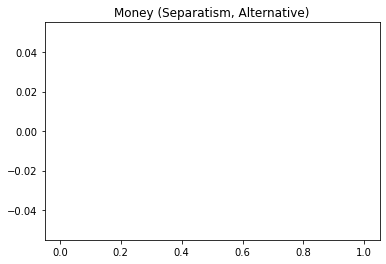

0


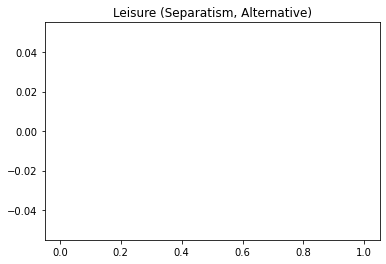

0


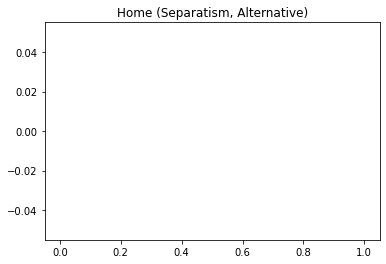

0


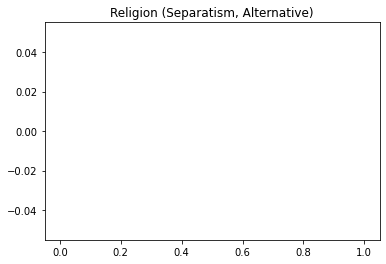

0


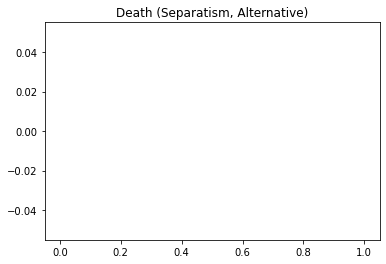

In [8]:
import matplotlib.pyplot as plt

for i, ideology in liwc_fields.items():
    for n, narrative in ideology.items():
        for c, data in narrative.items():
            print(len(data))
            plt.hist(data)
            plt.title(c + " (" + i + ", " + n + ")")
            plt.show()
            

In [3]:
ideologies = ["Religious", "Far right", "Far left", "Separatism"]
narratives = ["Pro", "Counter", "Alternative"]

# categories = [
#     "Affiliation", "Achievement", "Reward", "Power", "Risk",
#     "Family", "Friend", "Female", "Male",
#     "Anxiety", "Anger", "Sad", "Positive", "Negative",
#     "Work", "Money", "Leisure", "Home", "Religion", "Death",
# ]

columns = [
    ideologies,
    narratives
]

multiindex = pd.MultiIndex.from_product(columns, names=["Ideologies", "Narratives"])

In [5]:
data = np.array([])

for i in ideologies:
    for n in narratives:
        
        subdata = np.array([])
        for l in categories:
            try:
                subdata = np.append(subdata, np.mean(liwc_fields[i][n][l]))
            except KeyError:
                subdata = np.append(subdata, [0])
                
        try:
            data = np.vstack([data, subdata])
        except ValueError:
            data = subdata

data = data.T
data

array([[1.22058638e+00, 2.67306109e+00, 2.96296296e+00, 4.21725168e-01,
        3.50932247e+00, 3.36216013e-02, 1.60284184e+00, 0.00000000e+00,
        0.00000000e+00, 1.11221588e+00, 0.00000000e+00, 0.00000000e+00],
       [6.20414237e-01, 9.94705144e-01, 0.00000000e+00, 2.48944604e-01,
        2.68504730e+00, 1.88626519e-02, 1.36025771e+00, 0.00000000e+00,
        0.00000000e+00, 1.06127084e+00, 0.00000000e+00, 1.13636364e+00],
       [3.60810975e-01, 8.40316437e-01, 1.01010101e+00, 1.85946264e-01,
        1.28992237e+00, 2.37529691e-02, 7.09259163e-01, 0.00000000e+00,
        0.00000000e+00, 9.01012209e-01, 0.00000000e+00, 2.27272727e+00],
       [2.23207012e+00, 1.92985462e+00, 2.12121212e+00, 9.25398535e-01,
        2.54677402e+00, 7.42280285e-03, 3.65117629e+00, 8.33333333e-01,
        0.00000000e+00, 1.80256360e+00, 0.00000000e+00, 0.00000000e+00],
       [3.43811059e-01, 4.74702350e-01, 0.00000000e+00, 1.36143891e-01,
        2.57873753e-01, 0.00000000e+00, 4.21926322e-01, 0.00

In [5]:
frame = pd.DataFrame(data, index=categories, columns=multiindex)
# s = frame.style.format('{:.2f}%').hide_columns([
#     ("Separatism", "Alternative"), ("Separatism", "Counter"), ("Far right", "Alternative"), ("Far left", "Alternative")
# ])
s = frame.style.format('{:.2f}%')
s

[0.42496688 0.48180661 0.82382673 0.84085456 0.97274722 0.97913812
 1.51177809 2.12982962]
[0.98175806 1.31666017 1.32572866 1.50107547 1.53275986 1.90114201
 2.63990466 9.11918355]
[0.75757576 0.83333333 1.59090909 2.14646465 2.22222222 2.34848485]
[0.2183163  0.24795673 0.26944228 0.41107964 0.41766832 0.54173734
 0.56114161 0.91956312]
[0.92994426 1.28503503 1.56999088 2.53748758 2.6773976  3.49652992
 4.40778589 4.75899676]
[0.00067941 0.00067941 0.00067941 0.00067941 0.00067941 0.00067941
 0.00067941 0.00067941]
[0.85501902 0.89429135 1.34522286 1.58512572 1.61058863 2.15425947
 2.76080758 3.61082006]
[]
[]
[0.89545464 1.05484769 1.10573356 1.2975004  1.54161878 1.79107988
 1.87299316 1.961284  ]
[]
[0.64935065 0.64935065 1.2987013 ]


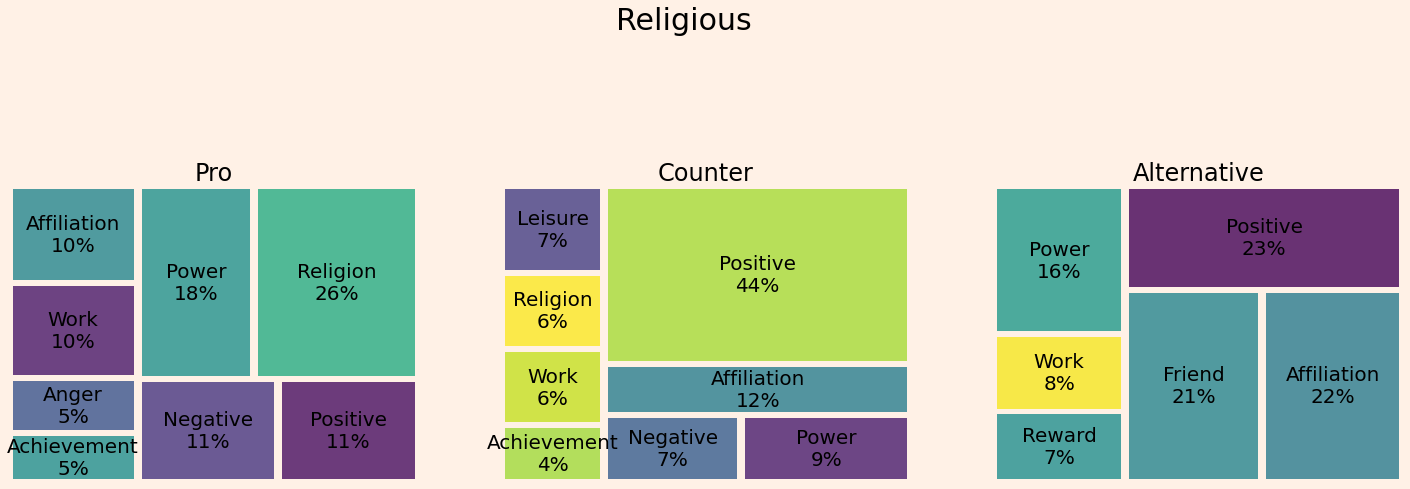

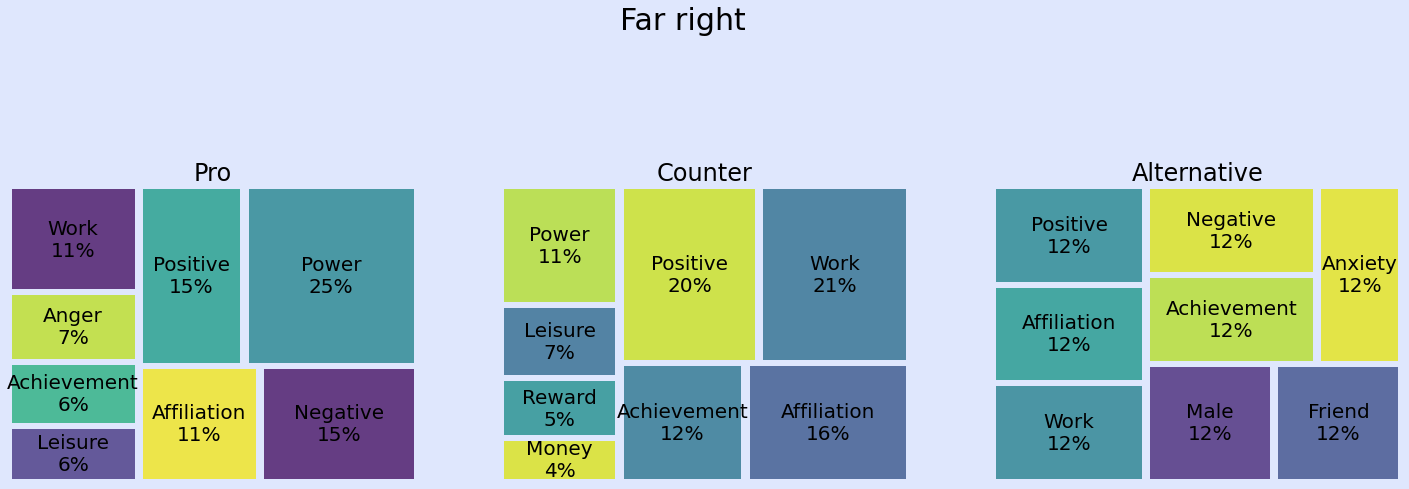

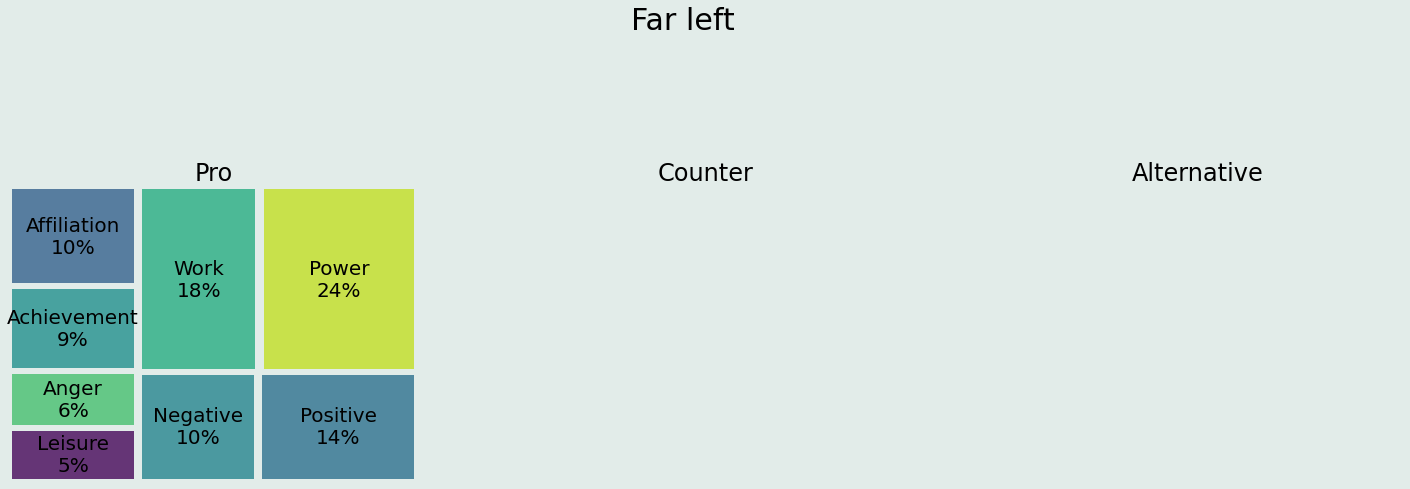

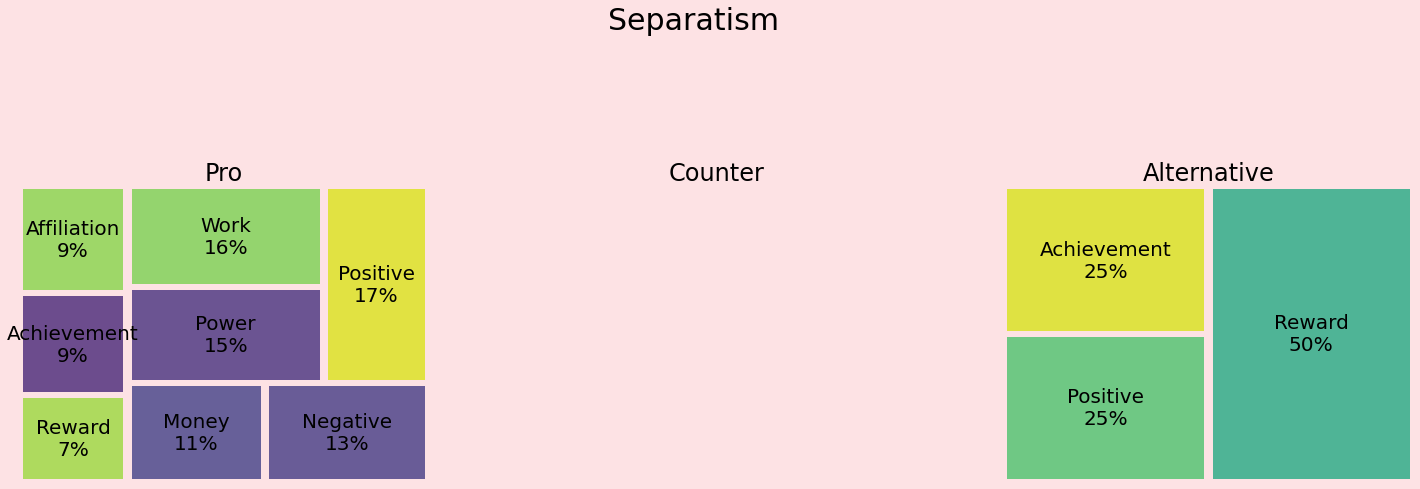

In [13]:
import squarify
import matplotlib.pyplot as plt

plt.rc('font', size=20)
background = ["#fff1e6", "#fde2e4", "#e2ece9", "#dfe7fd"]

colors = ["#264653", "#2A9D8F", "#E9C46A", "#F4A261", "#E76F51"]

n = 0
for ideology, narrative in multiindex:
    
    if not n%3:
        f = plt.figure(facecolor = background[n%4])
        f.suptitle(ideology, fontsize=30)
        f.set_figwidth(25)
        f.set_figheight(25)
#         plt.figure(facecolor = background[n])
    
#     ax = plt.axes()
#     ax.set_facecolor(background[n])
    
    plt.subplot(4, 3, n%3+1)
    plt.axis('off')
    plt.title(narrative)
    n += 1
    
    values = frame[ideology][narrative].values
    values = np.sort(values)[-8:]
    values = values[values > 0.]
    total = np.sum(values)
    print(values)

    index = frame.sort_values((ideology,narrative)).index[-len(values):]
    index = list(map(lambda x, y: x + "\n" + str(int(y*100/total)) + "%", index, values))
#     print(index)
    
    if np.any(np.isnan(values)):
        continue

    squarify.plot(sizes=values, label=index, alpha=.8, pad=True)
    
plt.show()

In [4]:
data = np.array([])

for i in ideologies:
    for n in narratives:                
        try:
            data = np.vstack([data, location_fields[i][n]])
        except ValueError:
            data = location_fields[i][n]

data = data.T

indices = np.sum(data, 1) > 20
# for i in range(0, len(places)):
#     if np.sum(data[i]) < 20:
#         indices = np.append(indices, [i])
   
print(data)
print(indices)
data = data[indices]
places = places[indices]

data

NameError: name 'location_fields' is not defined

In [58]:
location_frame = pd.DataFrame(data, index=places, columns=multiindex)
# s = frame.style.format('{:.2f}%').hide_columns([
#     ("Separatism", "Alternative"), ("Separatism", "Counter"), ("Far right", "Alternative"), ("Far left", "Alternative")
# ])
s = location_frame.style.format('{:.0f}')
s

In [11]:
frame.describe()

Ideologies  Religious                         Far right             \
Narratives        Pro    Counter Alternative        Pro    Counter   
count       20.000000  20.000000   20.000000  20.000000  20.000000   
mean         1.293382   1.444692    0.712121   1.003624   1.276388   
std          1.287090   2.454934    1.301620   0.992238   1.594504   
min          0.145762   0.231363    0.000000   0.101605   0.040536   
25%          0.488417   0.289230    0.000000   0.312870   0.149005   
50%          0.721370   0.530069    0.000000   0.517889   0.382090   
75%          1.967363   1.523590    1.515152   1.499492   1.939803   
max          5.038285  11.314251    4.696970   3.745654   4.846261   

Ideologies               Far left                        Separatism          \
Narratives Alternative        Pro    Counter Alternative        Pro Counter   
count              0.0  20.000000  20.000000         0.0  20.000000     0.0   
mean               NaN   0.913463   0.716622         NaN   1.121045     NaN   
std                NaN   0.842549   1.025103         NaN   1.033255     NaN   
min                NaN   0.115438   0.000000         NaN   0.114174     NaN   
25%                NaN   0.264483   0.126689         NaN   0.217599     NaN   
50%                NaN   0.489466   0.301473         NaN   0.791473     NaN   
75%                NaN   1.441982   0.828650         NaN   1.690168     NaN   
max                NaN   2.519298   3.833047         NaN   3.159842     NaN   

Ideologies              
Narratives Alternative  
count              0.0  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

In [12]:
frame.transpose().describe()

,Affiliation,Achievement,Reward,Power,Risk,Family,Friend,Female,Male,Anxiety,Anger,Sad,Positive,Negative,Work,Money,Leisure,Home,Religion,Death
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1.864294,1.797761,0.868589,2.626680,0.380479,0.183312,0.347443,0.192842,0.363533,0.248358,0.706255,0.385867,4.051853,1.783810,2.126350,0.631902,0.980216,0.201761,1.048290,0.413751
std,1.116141,1.193154,0.515444,1.035795,0.310924,0.144015,0.476167,0.162764,0.226175,0.156056,0.429037,0.432830,3.162114,0.996461,1.354507,0.529090,0.651105,0.173068,1.701107,0.460189
min,0.000000,0.000000,0.000000,0.520833,0.000000,0.000000,0.115438,0.000000,0.000000,0.000000,0.000000,0.000000,1.245343,0.000000,0.260417,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.518911,1.142579,0.554680,2.355330,0.186369,0.119679,0.141637,0.085631,0.199725,0.171745,0.466639,0.218152,2.503354,1.267606,1.605485,0.346564,0.678259,0.112423,0.188636,0.177049
50%,1.743050,1.528635,0.859720,2.747089,0.393380,0.151341,0.154650,0.181519,0.406204,0.248916,0.741265,0.276571,2.719924,2.135179,1.846088,0.487504,0.884717,0.183699,0.369511,0.280363
75%,2.265613,2.425529,1.313207,3.288067,0.541730,0.215646,0.269576,0.294648,0.493311,0.343135,0.972619,0.341769,4.708626,2.407832,2.262586,0.872802,1.404923,0.272032,0.818932,0.440865
max,3.581393,3.833047,1.515152,3.745654,0.915436,0.492515,1.515152,0.472275,0.707132,0.503738,1.276665,1.407967,11.314251,2.918032,4.846261,1.682816,1.904739,0.535255,5.038285,1.407967


In [13]:
frame.idxmax(), frame.max()

(Ideologies  Narratives 
 Religious   Pro               Religion
             Counter           Positive
             Alternative       Positive
 Far right   Pro                  Power
             Counter               Work
             Alternative            NaN
 Far left    Pro               Positive
             Counter        Achievement
             Alternative            NaN
 Separatism  Pro                   Work
             Counter                NaN
             Alternative            NaN
 dtype: object,
 Ideologies  Narratives 
 Religious   Pro             5.038285
             Counter        11.314251
             Alternative     4.696970
 Far right   Pro             3.745654
             Counter         4.846261
             Alternative          NaN
 Far left    Pro             2.519298
             Counter         3.833047
             Alternative          NaN
 Separatism  Pro             3.159842
             Counter              NaN
             Alternative          Na

In [14]:
frame.idxmax(axis=1)

Affiliation        (Far right, Counter)
Achievement         (Far left, Counter)
Reward         (Religious, Alternative)
Power                  (Far right, Pro)
Risk                  (Separatism, Pro)
Family                 (Religious, Pro)
Friend         (Religious, Alternative)
Female             (Far right, Counter)
Male                   (Religious, Pro)
Anxiety                (Religious, Pro)
Anger                  (Religious, Pro)
Sad                 (Far left, Counter)
Positive           (Religious, Counter)
Negative            (Far left, Counter)
Work               (Far right, Counter)
Money                 (Separatism, Pro)
Leisure            (Religious, Counter)
Home               (Religious, Counter)
Religion               (Religious, Pro)
Death               (Far left, Counter)
dtype: object

<AxesSubplot:>

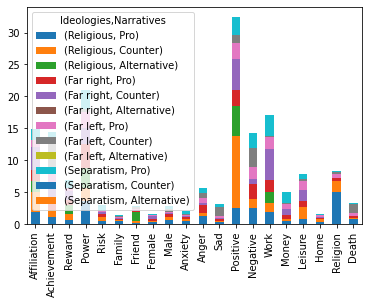

In [18]:
frame.plot.bar(stacked=True)

## Normalized values respect other categories

In [5]:
categories = [
    "Affiliation", "Achievement", "Reward", "Power", "Risk",
    "Family", "Friend", "Female", "Male",
    "Anxiety", "Anger", "Sad", "Positive", "Negative",
    "Work", "Money", "Leisure", "Home", "Religion", "Death",
]
categ_dict = dict((key,value) for key, value in zip(categories, [np.array([])]*20))

liwc_fields = {
    "Religious": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()},
    "Far right": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()},
    "Far left": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()},
    "Separatism": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()}
}

for doc in elastic_docs:
    tweet = doc["_source"]
#     categ_copy = categories.copy()
    
    for ideology in tweet["ideology"]:
        narrative = tweet[ideology]

        liwc = {}

        for k,v in tweet["liwc:result"].items():
            k = k.lower()
            k = "achievement" if k == "achiev" else k
            k = 'anxiety' if k == 'anx' else k
            k = 'positive' if k == 'posemo' else k
            k = 'negative' if k == 'negemo' else k
            k = "religion" if k == "relig" else k

            k = ''.join(k[0].upper() + k[1:].lower())
            if k not in categories:
                continue

            liwc.update({k: v})

        values = np.array(list(liwc.values()))
        total = np.sum(values)
        
        for category in categories:
            try:
                liwc_fields[ideology][narrative][category] = np.append(
                    liwc_fields[ideology][narrative][category],
                    liwc[category]*100/total
                )
            except KeyError:
                liwc_fields[ideology][narrative][category] = np.append(
                    liwc_fields[ideology][narrative][category],[0]
                )    

In [6]:
ideologies = ["Religious", "Far right", "Far left", "Separatism"]
narratives = ["Pro", "Counter", "Alternative"]

columns = [
    ideologies,
    narratives
]

index = pd.MultiIndex.from_product(columns, names=["Ideologies", "Narratives"])

In [7]:
data = np.array([])

for i in ideologies:
    for n in narratives:
        
        subdata = np.array([])
        for l in categories:
            try:
                subdata = np.append(subdata, np.mean(liwc_fields[i][n][l]))
            except KeyError:
                subdata = np.append(subdata, [0])
                
        try:
            data = np.vstack([data, subdata])
        except ValueError:
            data = subdata

data = data.T

In [8]:
frame = pd.DataFrame(data, index=categories, columns=index)
s = frame.style.format('{:.2f}%')
s

['#D8E9F7', '#E7F3D1', '#E0EDF4', '#FFDEDD', '#FCF8F7', '#BAD8D8']
['#E0EDF4', '#FFDEDD', '#E9E5F3', '#FCF8F7', '#D8E9F7', '#E7F3D1']
['#FFECF5', '#E0EDF4', '#FCF8F7', '#E7F3D1', '#FFE0E9', '#D8E9F7']
['#F0F8E6', '#FCF8F7', '#E9E5F3', '#FFDEDD', '#D1D8FD', '#E7F3D1']
['#E9E5F3', '#FCF8F7', '#D1D8FD', '#D8E9F7', '#E0EDF4', '#E7F3D1']
['#FCF8F7', '#E9E5F3', '#E0EDF4', '#D1D8FD', '#D8E9F7', '#E7F3D1']
['#D1D8FD', '#FFDEDD', '#D8E9F7', '#E7F3D1', '#E0EDF4', '#FCF8F7']
['#BEE9ED', '#FCF8F7', '#E9E5F3', '#E7F3D1', '#D8E9F7', '#FFDEDD']
['#FBFBEF', '#D8E9F7', '#E0EDF4', '#FFDEDD', '#FCF8F7', '#E7F3D1']
['#D8E9F7', '#F0F8E6', '#FFDEDD', '#FCF8F7', '#E0EDF4', '#E7F3D1']
['#E0EDF4', '#D8E9F7', '#D1D8FD', '#FFDEDD', '#E9E5F3', '#E7F3D1']
['#F3F3F3', '#FCF8F7', '#FFECF5', '#E7F3D1', '#D1D8FD', '#D8E9F7']


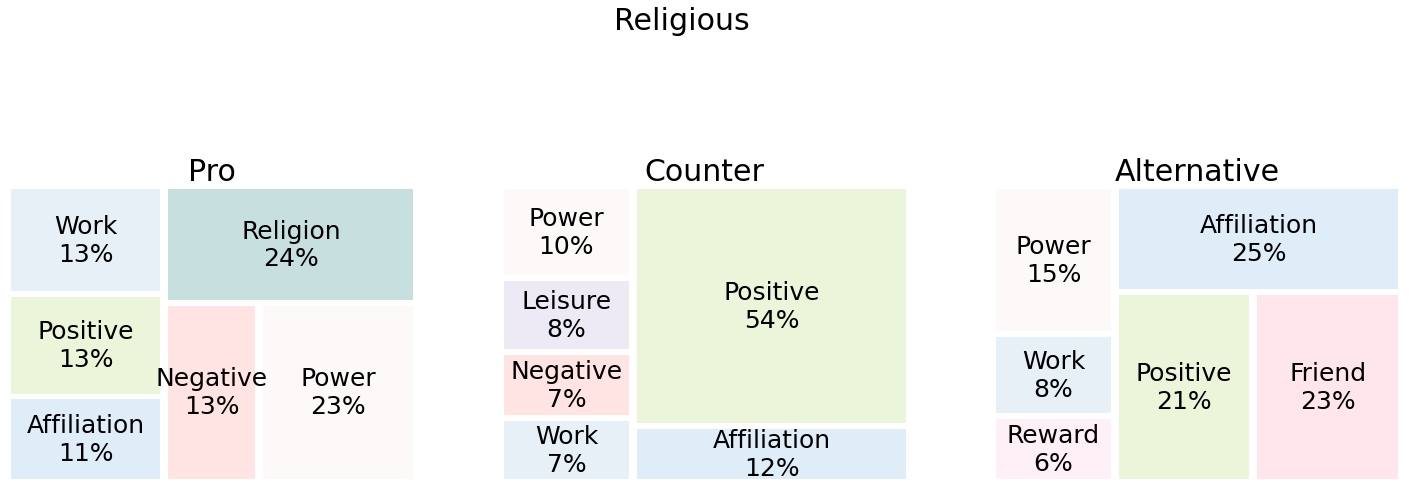

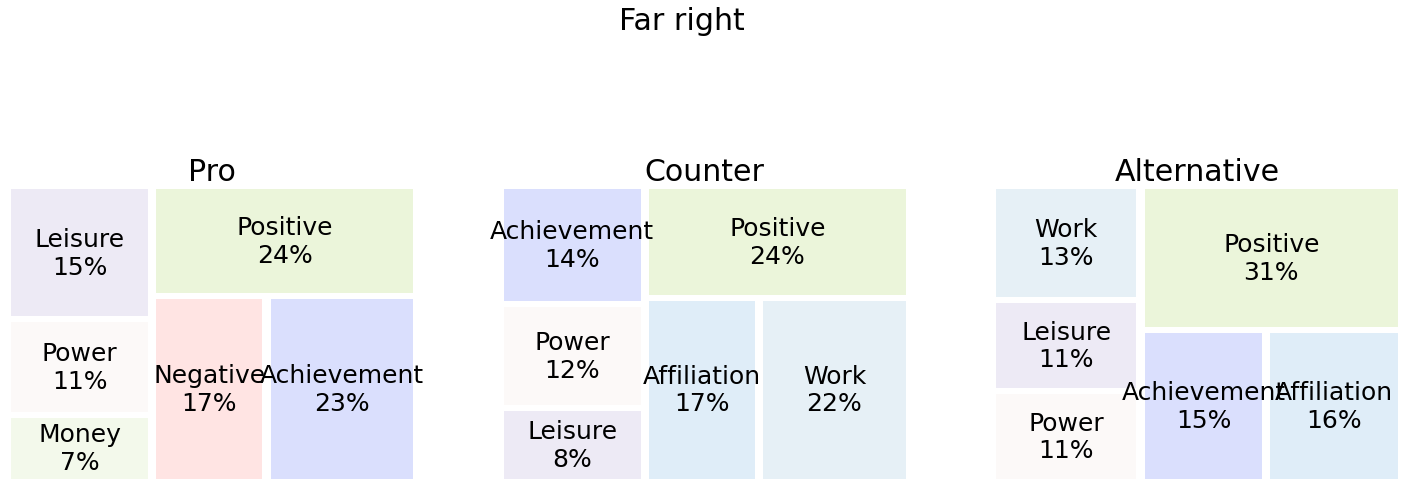

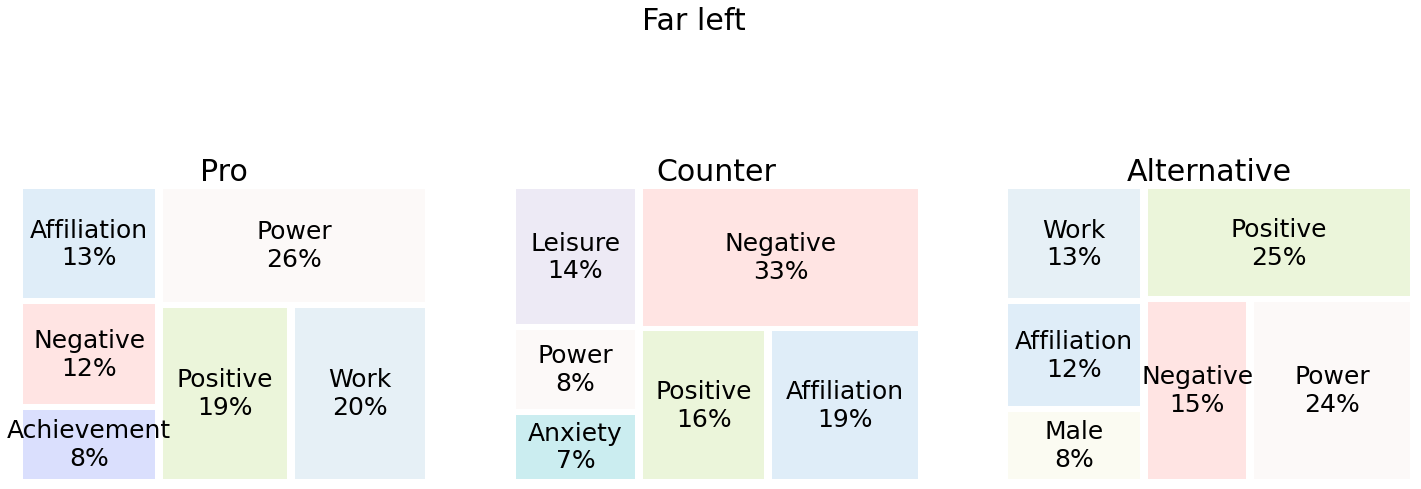

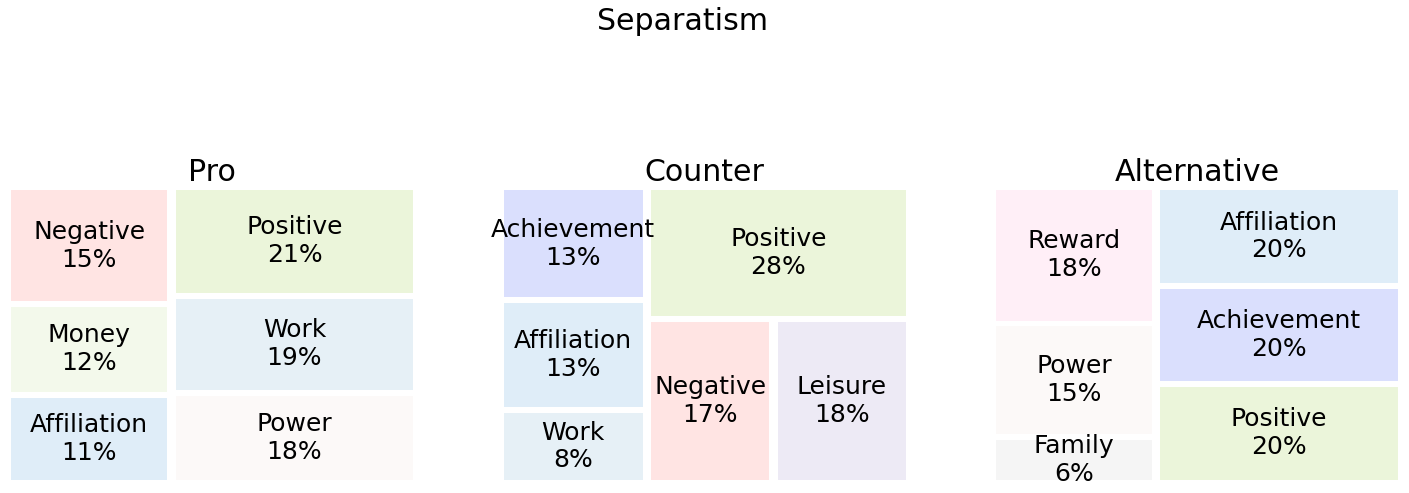

In [12]:
import squarify
import matplotlib.pyplot as plt

plt.rc('font', size=25)
background = ["#fff1e6", "#fde2e4", "#e2ece9", "#dfe7fd"]

colors = [
    "#D8E9F7", "#D1D8FD", "#FFECF5", "#FCF8F7", "#FFEED3",
    "#F3F3F3", "#FFE0E9", "#F9F6E6", "#FBFBEF", "#BEE9ED",
    "#FFD2F2", "#97DBF3", "#E7F3D1", "#FFDEDD", "#E0EDF4",
    "#F0F8E6", "#E9E5F3", "#FEEEF5", "#BAD8D8", "#D1E7D2"
]

color_map = {}

for cat in categories:
    for col in colors:
        color_map.update({cat: col})
        colors.remove(col)
        break

n = 0
for ideology, narrative in multiindex:
    
    if not n%3:
        f = plt.figure()
        f.suptitle(ideology, fontsize=30)
        f.set_figwidth(25)
        f.set_figheight(25)
#         plt.figure(facecolor = background[n])
    
#     ax = plt.axes()
#     ax.set_facecolor(background[n])
    
    plt.subplot(4, 3, n%3+1)
    plt.axis('off')
    plt.title(narrative)
    n += 1
    
    values = frame[ideology][narrative].values
    values = np.sort(values)[-6:]
    values = values[values > 0.]
    total = np.sum(values)
#     print(values)

    index = frame.sort_values((ideology,narrative)).index[-len(values):]
    colors = list(map(lambda x: color_map[x], index))
    index = list(map(lambda x, y: x + "\n" + str(int(y*100/total)) + "%", index, values))
#     print(index)
    
    if np.any(np.isnan(values)):
        continue

    squarify.plot(sizes=values, label=index, alpha=.8, color=colors, pad=True)
    
plt.show()

In [29]:
frame.idxmax(), frame.max()

(Ideologies  Narratives 
 Religious   Pro               Religion
             Counter           Positive
             Alternative       Positive
 Far right   Pro                  Power
             Counter           Positive
             Alternative            NaN
 Far left    Pro               Positive
             Counter        Achievement
             Alternative            NaN
 Separatism  Pro                   Work
             Counter                NaN
             Alternative            NaN
 dtype: object,
 Ideologies  Narratives 
 Religious   Pro            17.418961
             Counter        43.148718
             Alternative    32.500000
 Far right   Pro            16.775621
             Counter        19.036258
             Alternative          NaN
 Far left    Pro            13.745520
             Counter        36.458333
             Alternative          NaN
 Separatism  Pro            13.442396
             Counter              NaN
             Alternative          Na

In [15]:
morals = [
    "Harm Virtue", "Harm Vice", "Fairness Virtue", "Fairness Vice", "Ingroup Virtue", "Ingroup Vice",
    "Authority Virtue", "Authority Vice", "Purity Virtue", "Purity Vice"
]
categ_dict = dict((key,value) for key, value in zip(morals, [np.array([])]*20))

moral_fields = {
    "Religious": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()},
    "Far right": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()},
    "Far left": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()},
    "Separatism": {"Pro": categ_dict.copy(), "Counter": categ_dict.copy(), "Alternative": categ_dict.copy()}
}

for doc in elastic_docs:
    # get source data from document
    source_data = doc["_source"]

    for ideology in source_data["ideology"]:
        narrative = source_data[ideology]
        
        categ_copy = morals.copy()
        
        if "radar_mft" not in source_data: continue
        for i in source_data["radar_mft"]:
            category = i["key"]
            categ_copy.remove(category)
            
            moral_fields[ideology][narrative][category] = np.append(
                moral_fields[ideology][narrative][category], i["value"]
            )
            
        for c in categ_copy:
            moral_fields[ideology][narrative][c] = np.append(
                moral_fields[ideology][narrative][c], [0]
            )

moral_fields

{'Religious': {'Pro': {'Harm Virtue': array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          4.16666667]),
   'Harm Vice': array([2.38095238, 2.27272727, 0.        , ..., 0.        , 0.        ,
          0.        ]),
   'Fairness Virtue': array([0., 0., 0., ..., 0., 0., 0.]),
   'Fairness Vice': array([0., 0., 0., ..., 0., 0., 0.]),
   'Ingroup Virtue': array([0.        , 0.        , 0.        , ..., 3.44827586, 2.63157895,
          0.        ]),
   'Ingroup Vice': array([0., 0., 0., ..., 0., 0., 0.]),
   'Authority Virtue': array([0., 0., 0., ..., 0., 0., 0.]),
   'Authority Vice': array([0.        , 0.        , 5.26315789, ..., 0.        , 0.        ,
          0.        ]),
   'Purity Virtue': array([0., 0., 0., ..., 0., 0., 0.]),
   'Purity Vice': array([0., 0., 0., ..., 0., 0., 0.])},
  'Counter': {'Harm Virtue': array([2.22222222, 0.        , 0.        , ..., 2.85714286, 2.38095238,
          1.96078431]),
   'Harm Vice': array([0., 0., 0., ..., 0., 

In [16]:
data = np.array([])

for i in ideologies:
    for n in narratives:
        
        subdata = np.array([])
        for l in morals:
            try:
                subdata = np.append(subdata, np.mean(moral_fields[i][n][l]))
            except KeyError:
                subdata = np.append(subdata, [0])
                
        try:
            data = np.vstack([data, subdata])
        except ValueError:
            data = subdata

data = data.T
data

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([[0.56482556, 4.33569006,        nan, 0.4059561 , 0.20732116,
        0.50877005, 0.30937965, 0.        , 0.44947799, 0.65130273,
        0.274888  , 0.        ],
       [1.29545727, 0.07146836,        nan, 0.92768639, 0.18333545,
        0.48515913, 0.75311834, 5.95238095, 0.54066536, 0.54395417,
        0.44183337, 0.        ],
       [0.08540283, 0.00771441,        nan, 0.06587987, 1.23918118,
        0.21095565, 0.15365295, 0.        , 0.3381346 , 0.16861024,
        0.1451324 , 0.        ],
       [0.03104013, 0.02128799,        nan, 0.06577344, 0.13122013,
        0.10620008, 0.01499719, 0.        , 0.12926706, 0.06099369,
        0.0562963 , 0.        ],
       [0.62390491, 0.43535603,        nan, 0.89405872, 0.84957153,
        1.38203577, 0.89202345, 0.        , 0.59848642, 0.60132673,
        0.58754734, 2.77777778],
       [0.47434166, 0.05996922,        nan, 0.22103972, 0.05704531,
        0.03895598, 0.23085172, 0.        , 0.19376704, 0.31756969,
        0.35100991,

In [17]:
frame = pd.DataFrame(data, index=morals, columns=multiindex)
# s = frame.style.format('{:.2f}%').hide_columns([
#     ("Separatism", "Alternative"), ("Separatism", "Counter"), ("Far right", "Alternative"), ("Far left", "Alternative")
# ])
s = frame.style.format('{:.2f}%')
s

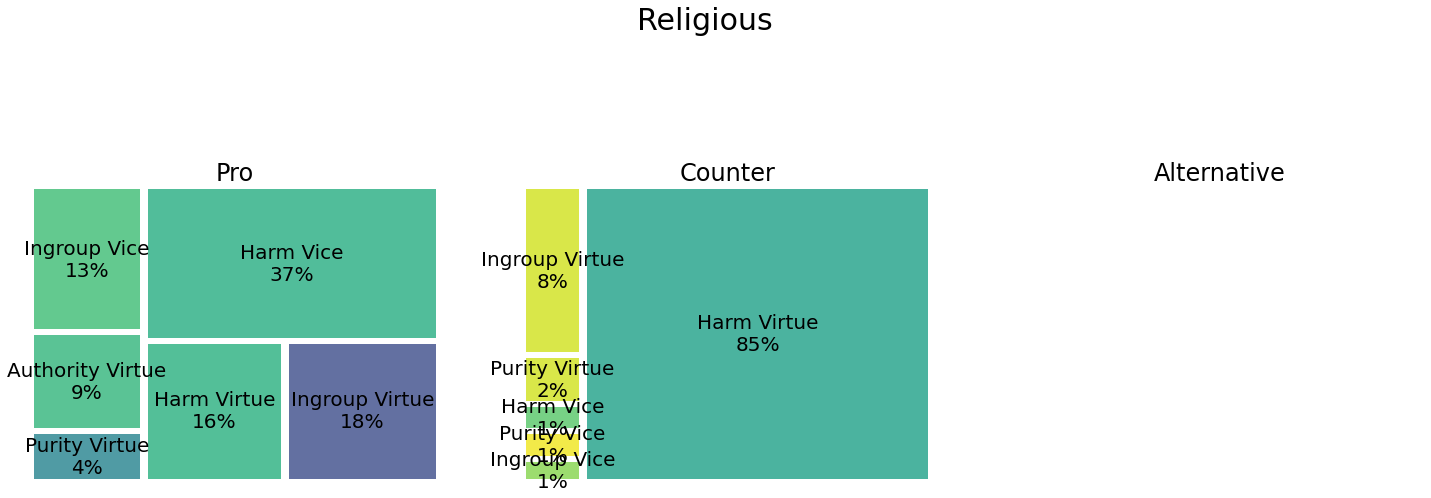

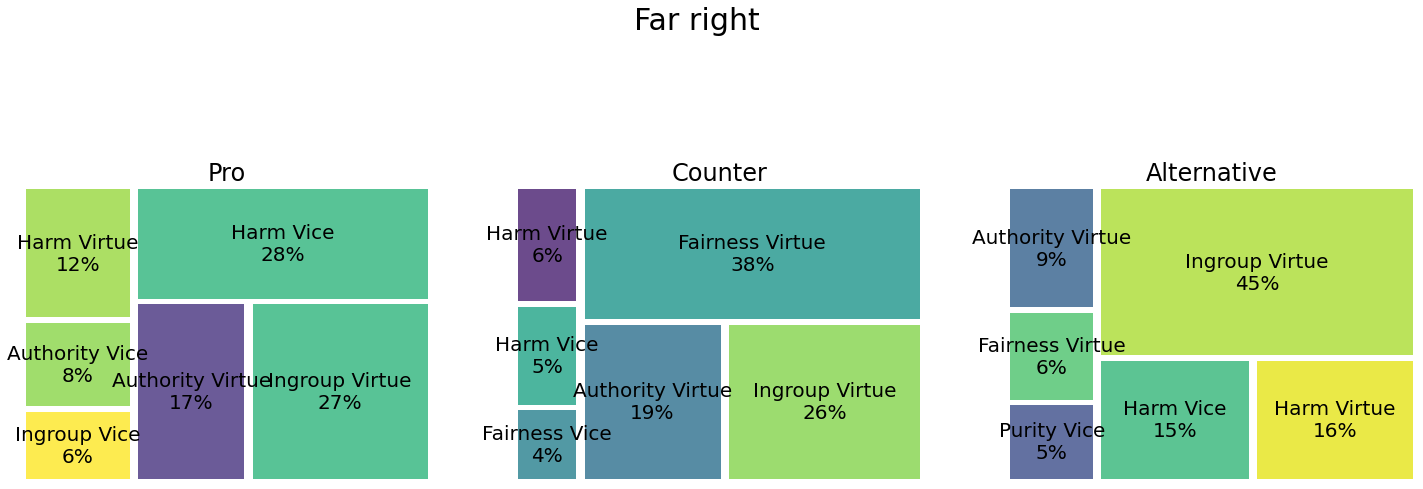

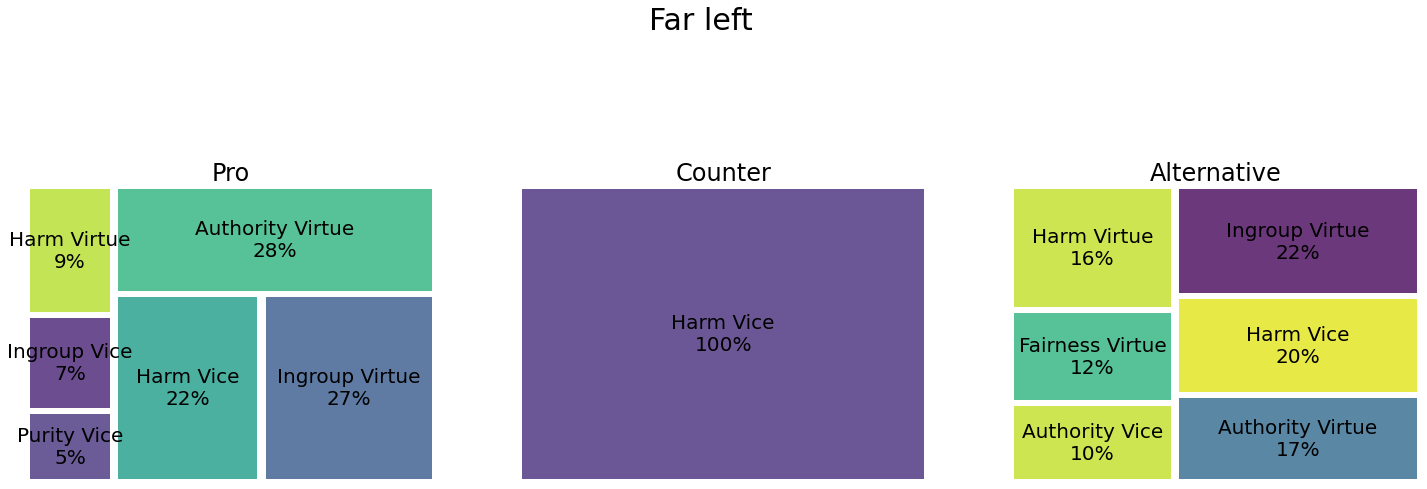

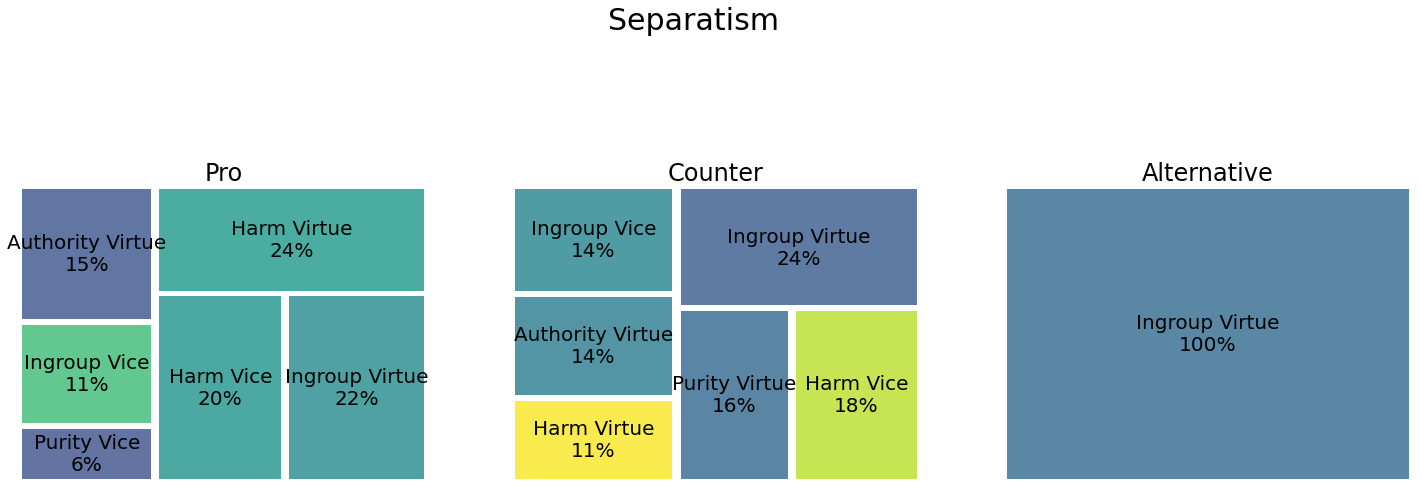

In [11]:
import squarify
import matplotlib.pyplot as plt

plt.rc('font', size=20)
background = ["#fff1e6", "#fde2e4", "#e2ece9", "#dfe7fd"]

n = 0
for ideology, narrative in multiindex:
    
    if not n%3:
        f = plt.figure()
        f.suptitle(ideology, fontsize=30)
        f.set_figwidth(25)
        f.set_figheight(25)
#         plt.figure(facecolor = background[n])
    
#     ax = plt.axes()
#     ax.set_facecolor(background[n])
    
    plt.subplot(4, 3, n%3+1)
    plt.axis('off')
    plt.title(narrative)
    n += 1
    
    values = frame[ideology][narrative].values
    values = np.sort(values)[-6:]
    values = values[values > 0.]
    total = np.sum(values)
#     print(values)

    index = frame.sort_values((ideology,narrative)).index[-len(values):]
    index = list(map(lambda x, y: x + "\n" + str(int(y*100/total)) + "%", index, values))
#     print(index)
    
    if np.any(np.isnan(values)):
        continue

    squarify.plot(sizes=values, label=index, alpha=.8, pad=True)
    
plt.show()

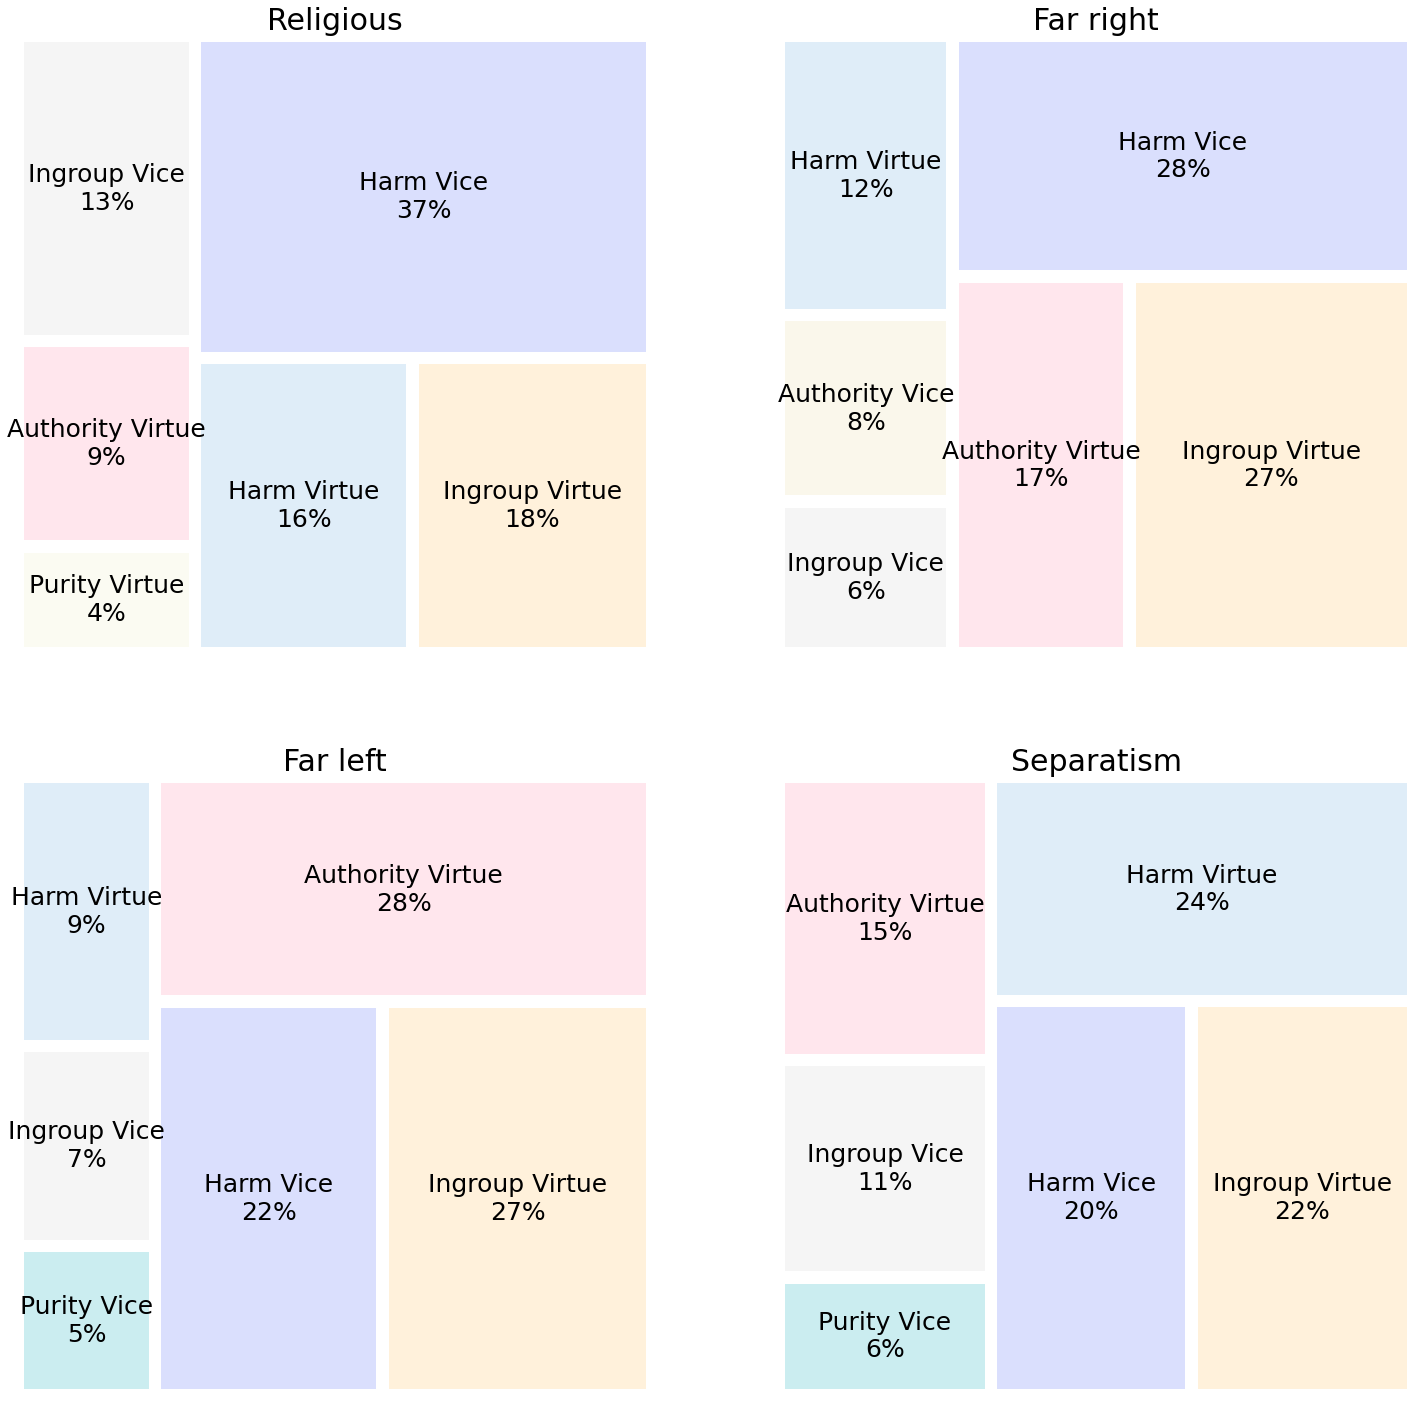

In [18]:
import squarify
import matplotlib.pyplot as plt

plt.rc('font', size=25)

f = plt.figure()
# f.suptitle("Moral values", fontsize=30)
f.set_figwidth(25)
f.set_figheight(25)

colors = [
    "#D8E9F7", "#D1D8FD", "#FFECF5", "#FCF8F7", "#FFEED3",
    "#F3F3F3", "#FFE0E9", "#F9F6E6", "#FBFBEF", "#BEE9ED",
    "#FFD2F2", "#97DBF3", "#E7F3D1", "#FFDEDD", "#E0EDF4",
    "#F0F8E6", "#E9E5F3", "#FEEEF5", "#BAD8D8", "#D1E7D2"
]

color_map = {}

for cat in morals:
    for col in colors:
        color_map.update({cat: col})
        colors.remove(col)
        break

n=1
for ideology in ideologies:
    
    plt.subplot(2, 2, n)
    plt.axis('off')
    plt.title(ideology)
    n += 1
    
    values = frame[ideology]["Pro"].values
    values = np.sort(values)[-6:]
    values = values[values > 0.]
    total = np.sum(values)
#     print(values)

    index = frame.sort_values((ideology,"Pro")).index[-len(values):]
    colors = list(map(lambda x: color_map[x], index))
    index = list(map(lambda x, y: x + "\n" + str(int(y*100/total)) + "%", index, values))
#     print(index)
    
    if np.any(np.isnan(values)):
        continue

    squarify.plot(sizes=values, label=index, alpha=.8, color=colors, pad=True)
    
plt.show()

In [7]:
import numpy as np
import pandas as pd
from elasticsearch import Elasticsearch
import json

# create a client instance of the library
elastic_client = Elasticsearch()

query = {
    'size' : 10000,
    'query': {
        'match_all' : {}
    }
}

response = elastic_client.search( index='participation', body=query)
elastic_docs = response["hits"]["hits"]

print(json.dumps(elastic_docs, indent=3))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

